<a id='top'></a>

# StatsBomb 360 Data Engineering
##### Notebook to engineer previously parsed CSV data from the [StatsBomb Open Data GitHub repository](https://github.com/statsbomb/open-data) using [pandas](http://pandas.pydata.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 29/10/2021<br>
Notebook last updated: 05/12/2021

![StatsBomb](../../img/logos/stats-bomb-logo.png)

![StatsBomb 360](../../img/logos/stats-bomb-360-logo.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), [Data Engineering](#section4), [Data Aggregation](#section5), and [Subsetted DataFrames](#section6) sections.

___


## <a id='import_libraries'>Introduction</a>
This notebook engineered pubicly available [StatsBomb](https://statsbomb.com/) 360 data, using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

![Edd Webster](../../img/edd_webster/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/Parma%20Calcio%201913%20-%20StatsBomb%20Data%20Parsing%20and%20Engineering.ipynb).

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      4.    [Initial Data Handling](#section3.3)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
      2.    [Sort the DataFrame](#section4.2)<br>
      3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
      4.    [Determine Each Player's Total Minutes Played](#section4.4)<br>
      5.    [Isolate In-Play Events](#section4.5)<br>
      6.    [Break Down All location Attributes](#section4.6)<br>
      7.    [Create New Attributes](#section4.7)<br>
      8.    [Fill Null Values](#section4.8)<br>
      9.    [Export Events Dataset](#section4.9)<br>
5.    [Aggregated Data](#section5)<br>
      1.    [Groupby and Aggregate by Player and Match](#section5.1)<br>
      2.    [Groupby and Aggregate by Player for the Entire Tournament](#section5.2)<br>
6.    [Subset Data](#section6)<br>
      1.    [Passing Matrix Data](#section6.1)<br>
      2.    [Passing Network Data](#section6.2)<br>
      3.    [...](#section6.3)<br>
7.    [Summary](#section7)<br>
8.    [Next Steps](#section8)<br>
9.    [References](#section9)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [3]:
from rfpimp import *


# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
 
from imblearn.over_sampling import SMOTENC


from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import brier_score_loss

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

import pickle
from sklearn.metrics import plot_confusion_matrix 
import scikitplot as skplt

In [4]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Defined Variables

In [5]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [6]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_sb = os.path.join(base_dir, 'data', 'sb')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Create Directory Structure

In [7]:
# make the directory structure
for folder in ['combined', 'competitions', 'events', 'tactics', 'lineups']:
    path = os.path.join(data_dir_sb, 'raw', folder)
    if not os.path.exists(path):
        os.mkdir(path)

### Custom Functions

In [8]:
# Define custom functions for used in the notebook

## Function to read JSON files that also handles the encoding of special characters e.g. accents in names of players and teams
def read_json_file(filename):
    with open(filename, 'rb') as json_file:
        return BytesIO(json_file.read()).getvalue().decode('unicode_escape')

    
## Function to flatten pandas DataFrames with nested JSON columns. Source: https://stackoverflow.com/questions/39899005/how-to-flatten-a-pandas-dataframe-with-some-columns-as-json
def flatten_nested_json_df(df):

    df = df.reset_index()

    print(f"original shape: {df.shape}")
    print(f"original columns: {df.columns}")


    # search for columns to explode/flatten
    s = (df.applymap(type) == list).all()
    list_columns = s[s].index.tolist()

    s = (df.applymap(type) == dict).all()
    dict_columns = s[s].index.tolist()

    print(f"lists: {list_columns}, dicts: {dict_columns}")
    while len(list_columns) > 0 or len(dict_columns) > 0:
        new_columns = []

        for col in dict_columns:
            print(f"flattening: {col}")
            # explode dictionaries horizontally, adding new columns
            horiz_exploded = pd.json_normalize(df[col]).add_prefix(f'{col}.')
            horiz_exploded.index = df.index
            df = pd.concat([df, horiz_exploded], axis=1).drop(columns=[col])
            new_columns.extend(horiz_exploded.columns) # inplace

        for col in list_columns:
            print(f"exploding: {col}")
            # explode lists vertically, adding new columns
            df = df.drop(columns=[col]).join(df[col].explode().to_frame())
            new_columns.append(col)

        # check if there are still dict o list fields to flatten
        s = (df[new_columns].applymap(type) == list).all()
        list_columns = s[s].index.tolist()

        s = (df[new_columns].applymap(type) == dict).all()
        dict_columns = s[s].index.tolist()

        print(f"lists: {list_columns}, dicts: {dict_columns}")

    print(f"final shape: {df.shape}")
    print(f"final columns: {df.columns}")
    return df

### Notebook Settings

In [9]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
This Jupyter notebook is part of a series of notebooks to parse and engineer StatsBomb Event data.

This particular notebook is the **StatsBomb Data Engineer** notebook for 360 data, that takes a previously parsed dataset of StatsBomb 360 data from the StatsBomb Open Data GitHub Repository and prepares it for data analysis.

Links to these notebooks in the [`football_analytics`](https://github.com/eddwebster/football_analytics) GitHub repository can be found at the following:
*    [Data Parsing](https://github.com/eddwebster/football_analytics/tree/master/notebooks/2_data_parsing)
     +    [StatsBomb Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/ELO%20Team%20Ratings%20Data%20Parsing.ipynb)
*    [Data Engineering](https://github.com/eddwebster/football_analytics/tree/master/notebooks/3_data_engineering)
     +    [StatsBomb Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Player%20Stats%20Data%20Engineering.ipynb)

**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Reading In CSV Data</a>
The following cells read in the previously prepared DataFrame of StatsBomb 360 data.

In [10]:
df_sb_events_raw = pd.read_csv(os.path.join(data_dir_sb, 'raw', 'combined', 'combined_sb_360.csv'))
    
# Display DataFrame
df_sb_events_raw.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18,45,69,78,79,80,82,83,84,89,90,92,93,98,100,101,102,108,109,112,113,114,116,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,161,164,168,171) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,under_pressure,duel.type.id,duel.type.name,pass.aerial_won,counterpress,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,interception.outcome.id,interception.outcome.name,shot.statsbomb_xg,shot.end_location,shot.outcome.id,shot.outcome.name,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,out,pass.outswinging,pass.technique.id,pass.technique.name,clearance.head,clearance.body_part.id,clearance.body_part.name,pass.switch,off_camera,pass.cross,clearance.left_foot,dribble.overrun,dribble.nutmeg,clearance.right_foot,pass.no_touch,foul_committed.advantage,foul_won.advantage,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,shot.first_time,clearance.other,pass.miscommunication,clearance.aerial_won,pass.through_ball,ball_recovery.recovery_failure,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,shot.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.offensive,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name,pass.goal_assist,goalkeeper.technique.id,goalkeeper.technique.name,pass.cut_back,miscontrol.aerial_won,pass.straight,foul_committed.type.id,foul_committed.type.name,match_id,pass.inswinging,pass.deflected,injury_stoppage.in_chain,shot.one_on_one,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,block.deflection,foul_committed.penalty,foul_won.penalty,block.save_block,goalkeeper.punched_out,player_off.permanent,shot.saved_off_target,goalkeeper.shot_saved_off_target,shot.saved_to_post,goalkeeper.shot_saved_to_post,shot.open_goal,goalkeeper.penalty_saved_to_post,dribble.no_touch,block.offensive,shot.follows_dribble,ball_recovery.offensive,shot.redirect,goalkeeper.lost_in_play,goalkeeper.success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,0,9427b18a-6b10-411f-90da-3d6240b80c71,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,1835,Finland,1,Regular Play,1835,Finland,352.0,"[{'player': {'id': 8667, 'name': 'Lukáš Hrádec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### <a id='#section3.2'>3.2. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

#### <a id='#section3.2.1'>3.2.1. Summary Report</a>
Initial step of the data handling and Exploratory Data Analysis (EDA) is to create a quick summary report of the dataset using [pandas Profiling Report](https://github.com/pandas-profiling/pandas-profiling).

In [11]:
# Summary of the data using pandas Profiling Report
#pp.ProfileReport(df_sb_events_raw)

#### <a id='#section3.2.2'>3.2.2. Further Inspection</a>
The following commands go into more bespoke summary of the dataset. Some of the commands include content covered in the [pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) summary above, but using the standard [pandas](https://pandas.pydata.org/) functions and methods that most peoplem will be more familiar with.

First check the quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [12]:
# Display the first five rows of the DataFrame, df_sb_events_raw
df_sb_events_raw.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,under_pressure,duel.type.id,duel.type.name,pass.aerial_won,counterpress,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,interception.outcome.id,interception.outcome.name,shot.statsbomb_xg,shot.end_location,shot.outcome.id,shot.outcome.name,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,out,pass.outswinging,pass.technique.id,pass.technique.name,clearance.head,clearance.body_part.id,clearance.body_part.name,pass.switch,off_camera,pass.cross,clearance.left_foot,dribble.overrun,dribble.nutmeg,clearance.right_foot,pass.no_touch,foul_committed.advantage,foul_won.advantage,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,shot.first_time,clearance.other,pass.miscommunication,clearance.aerial_won,pass.through_ball,ball_recovery.recovery_failure,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,shot.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.offensive,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name,pass.goal_assist,goalkeeper.technique.id,goalkeeper.technique.name,pass.cut_back,miscontrol.aerial_won,pass.straight,foul_committed.type.id,foul_committed.type.name,match_id,pass.inswinging,pass.deflected,injury_stoppage.in_chain,shot.one_on_one,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,block.deflection,foul_committed.penalty,foul_won.penalty,block.save_block,goalkeeper.punched_out,player_off.permanent,shot.saved_off_target,goalkeeper.shot_saved_off_target,shot.saved_to_post,goalkeeper.shot_saved_to_post,shot.open_goal,goalkeeper.penalty_saved_to_post,dribble.no_touch,block.offensive,shot.follows_dribble,ball_recovery.offensive,shot.redirect,goalkeeper.lost_in_play,goalkeeper.success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,0,9427b18a-6b10-411f-90da-3d6240b80c71,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,1835,Finland,1,Regular Play,1835,Finland,352.0,"[{'player': {'id': 8667, 'name': 'Lukáš Hrádec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [13]:
# Display the last five rows of the DataFrame, df_sb_events_raw
df_sb_events_raw.tail()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,under_pressure,duel.type.id,duel.type.name,pass.aerial_won,counterpress,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,interception.outcome.id,interception.outcome.name,shot.statsbomb_xg,shot.end_location,shot.outcome.id,shot.outcome.name,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.position.id,goalkeeper.position.name,out,pass.outswinging,pass.technique.id,pass.technique.name,clearance.head,clearance.body_part.id,clearance.body_part.name,pass.switch,off_camera,pass.cross,clearance.left_foot,dribble.overrun,dribble.nutmeg,clearance.right_foot,pass.no_touch,foul_committed.advantage,foul_won.advantage,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,shot.first_time,clearance.other,pass.miscommunication,clearance.aerial_won,pass.through_ball,ball_recovery.recovery_failure,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.body_part.id,goalkeeper.body_part.name,shot.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.offensive,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name,pass.goal_assist,goalkeeper.technique.id,goalkeeper.technique.name,pass.cut_back,miscontrol.aerial_won,pass.straight,foul_committed.type.id,foul_committed.type.name,match_id,pass.inswinging,pass.deflected,injury_stoppage.in_chain,shot.one_on_one,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,block.deflection,foul_committed.penalty,foul_won.penalty,block.save_block,goalkeeper.punched_out,player_off.permanent,shot.saved_off_target,goalkeeper.shot_saved_off_target,shot.saved_to_post,goalkeeper.shot_saved_to_post,shot.open_goal,goalkeeper.penalty_saved_to_post,dribble.no_touch,block.offensive,shot.follows_dribble,ball_recovery.offensive,shot.redirect,goalkeeper.lost_in_play,goalkeeper.success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
192681,2992,8aa68a18-79d2-4b8b-ba5f-9d3124f1cd20,2993,2,00:50:23.150,95,23,151,0.87093,30,Pass,907,Wales,4,From Throw In,907,Wales,NaN,NaN,"['a0bdd045-65d0-4601-9378-a5dacdba3257', 'dcbf...","[110.7, 0.1]",3086.0,Ben Davies,6.0,Left Back,6399.0,Gareth Frank Bale,6.103278,1.254227,2.0,Low Pass,"[112.6, 5.9]",NaN,NaN,67.0,Throw-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Incomplete,NaN,Na

In [14]:
# Print the shape of the DataFrame, df_sb_events_raw
print(df_sb_events_raw.shape)

(192686, 197)


In [15]:
# Print the column names of the DataFrame, df_sb_events_raw
print(df_sb_events_raw.columns)

Index(['level_0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type.id',
       ...
       'country_name', 'competition_name', 'competition_gender',
       'competition_youth', 'competition_international', 'season_name',
       'match_updated', 'match_updated_360', 'match_available_360',
       'match_available'],
      dtype='object', length=197)


In [16]:
# Data types of the features of the raw DataFrame, df_sb_events_raw
df_sb_events_raw.dtypes

level_0                 int64
id                     object
index                   int64
period                  int64
timestamp              object
                        ...  
season_name             int64
match_updated          object
match_updated_360      object
match_available_360    object
match_available        object
Length: 197, dtype: object

In [17]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_sb_events_raw.dtypes)

level_0                               int64
id                                   object
index                                 int64
period                                int64
timestamp                            object
minute                                int64
second                                int64
possession                            int64
duration                            float64
type.id                               int64
type.name                            object
possession_team.id                    int64
possession_team.name                 object
play_pattern.id                       int64
play_pattern.name                    object
team.id                               int64
team.name                            object
tactics.formation                   float64
tactics.lineup                       object
related_events                       object
location                             object
player.id                           float64
player.name                     

<AxesSubplot:>

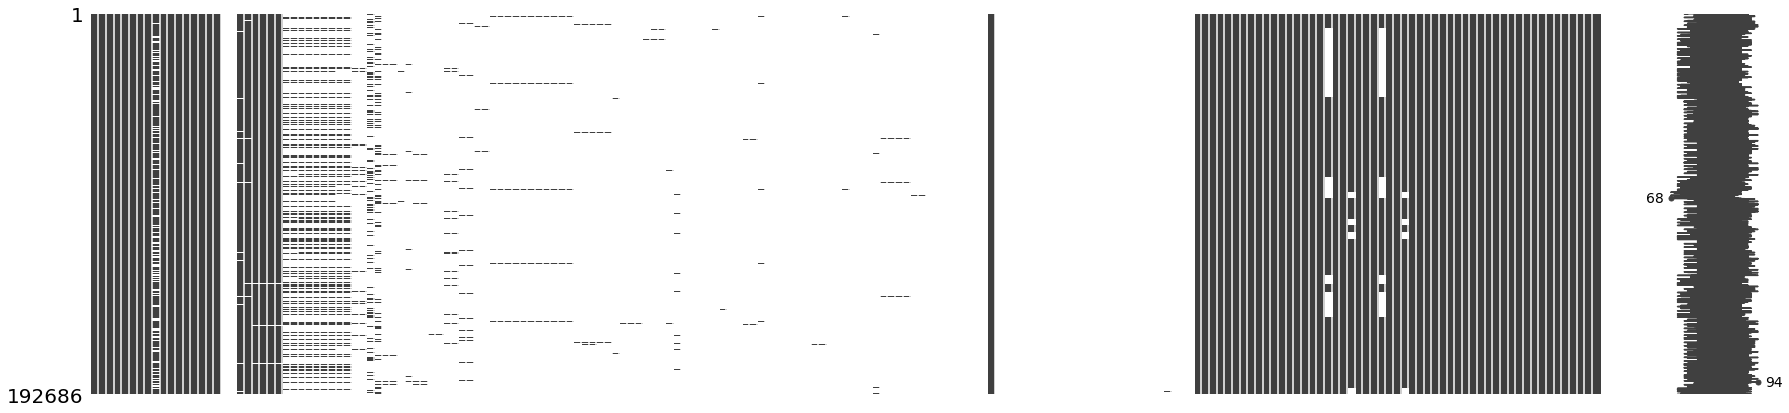

In [18]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_shots_raw
msno.matrix(df_sb_events_raw, figsize = (30, 7))

In [19]:
# Counts of missing values
null_value_stats = df_sb_events_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

duration                       52722
tactics.formation             192459
tactics.lineup                192459
related_events                  7079
location                        1530
                               ...  
goalkeeper.success_in_play    192684
home_team.home_team_group      63094
home_team.managers             12516
away_team.away_team_group      63094
away_team.managers             12516
Length: 131, dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
The next ext step is to wrangle the dataset to into a format that’s suitable for analysis, through the creation of bespoke in-possession and out-of-possession metrics.

This section is broken down into the following subsections:

4.1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
4.2.    [Sort the DataFrame](#section4.2)<br>
4.3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
4.4.    [Determine Each Player's Total Minutes Played](#section4.4)<br>
4.5.    [Isolate In-Play Events](#section4.5)<br>
4.6.    [Break Down All location Attributes](#section4.6)<br>
4.7.    [Create New Attributes](#section4.7)<br>
4.8.    [Fill Null Values](#section4.8)<br>
4.9.    [Export Events Dataset](#section4.9)<br>

### <a id='#section4.1'>4.1. Assign Raw DataFrame to Engineered DataFrame</a>

In [20]:
# Assign Raw DataFrame to Engineered DataFrame
df_sb_events = df_sb_events_raw

### <a id='#section4.2'>4.2. Clean Column Names
Remove dots (.) from column names.

In [21]:
# Replace dots (.) in column names with an underscore (_)
df_sb_events.columns = df_sb_events.columns.str.replace('[.]', '_')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### <a id='#section4.3'>4.3. Sort DataFrame</a>
Sort DataFrame into correct order of events by time and date, required for creating accurate features.

In [22]:
# Sort DataFrame

## Create a 'Full_Fixture Data' attribute from the date, teams, and goals scored
df_sb_events['Full_Fixture_Date'] = df_sb_events['match_date'].astype(str) + ' ' + df_sb_events['home_team_home_team_name'].astype(str)  + ' ' + df_sb_events['home_score'].astype(str) + ' ' + ' vs. ' + ' ' + df_sb_events['away_score'].astype(str) + ' ' + df_sb_events['away_team_away_team_name'].astype(str)

## Sort the DataFrame by the newly created 'Full_Fixture_Date' attribute
df_sb_events = df_sb_events.sort_values(['Full_Fixture_Date', 'match_date', 'timestamp'], ascending=[True, True, True])

### <a id='#section4.4'>4.4. Determine Each Player's Most Frequent Playing Position</a>
A player's dominant position is determined as the most frequent position in which the player is playing in the Events data i.e. the highest count of Events in that position. 

The following determined positions will be used as the player's primary position

In [23]:
# Determine Each Player's Most Frequent Playing Position

## Groupby and Aggregate by player name and position
df_sb_player_positions = (df_sb_events
                              .groupby(['player_name', 'team_name', 'position_name'])
                              .agg({'type_name': 'count'})
                              .reset_index()
                         )

## Rename columns after groupby and aggregation
df_sb_player_positions.columns = ['player_name', 'team_name', 'primary_position_name', 'count']

## Drop level
#df_sb_player_positions.columns = df_sb_player_positions.columns.droplevel(level=0)

## Reset index
df_sb_player_positions = df_sb_player_positions.reset_index()

## Sort by 'mins_total' decending
df_sb_player_positions = df_sb_player_positions.sort_values(['player_name', 'count'], ascending=[True, False])

## Groupby position and drop the counts
df_sb_player_positions = (df_sb_player_positions
                              .groupby(['player_name', 'team_name']).head(1)
                              .drop(['index', 'count'], axis=1)
                         )

## Display DataFrame
df_sb_player_positions.head(5)

,player_name,team_name,primary_position_name
2,Aaron Ramsey,Wales,Left Center Midfield
3,Adam Hložek,Czech Republic,Left Wing
6,Adama Traoré Diarra,Spain,Right Back
8,Admir Mehmedi,Switzerland,Left Center Forward
11,Adrien Rabiot,France,Left Center Midfield


Aggregate the positions into Goalkeepers, Defenders, Midfielders, and Forwards.

In [25]:
# Show all unique values for position
df_sb_events['position_name'].unique()

array([nan, 'Right Center Midfield', 'Right Back', 'Center Forward',
       'Center Defensive Midfield', 'Left Center Back', 'Left Back',
       'Right Midfield', 'Right Center Back', 'Goalkeeper', 'Left Wing',
       'Left Midfield', 'Left Center Midfield', 'Right Wing',
       'Right Defensive Midfield', 'Center Attacking Midfield',
       'Left Defensive Midfield', 'Left Wing Back', 'Center Back',
       'Right Wing Back', 'Right Attacking Midfield',
       'Left Attacking Midfield', 'Left Center Forward',
       'Right Center Forward'], dtype=object)

In [26]:
# Map a defined dictionary of grouped positions, per specific position

## Define a dictionary of positions
dict_positions_grouped = {'Goalkeeper': 'Goalkeeper',
                          'Left Center Back': 'Defender',
                          'Center Back': 'Defender',
                          'Right Center Back': 'Defender',
                          'Left Back': 'Defender',
                          'Right Back': 'Defender',
                          'Left Wing Back': 'Defender',
                          'Right Wing Back': 'Defender',
                          'Left Defensive Midfield': 'Midfield',
                          'Center Defensive Midfield': 'Midfield',
                          'Right Defensive Midfield': 'Midfield',
                          'Left Center Midfield': 'Midfield',
                          'Center Midfield': 'Midfield',
                          'Right Center Midfield': 'Midfield',
                          'Left Midfield': 'Midfield',
                          'Right Midfield': 'Midfield',
                          'Left Attacking Midfield': 'Midfield',
                          'Right Attacking Midfield': 'Midfield',
                          'Center Attacking Midfield': 'Midfield',
                          'Left Center Forward': 'Forward',
                          'Center Forward': 'Forward',
                          'Right Center Forward': 'Forward',
                          'Left Wing': 'Forward',
                          'Right Wing': 'Forward',
                          'Secondary Striker': 'Forward'
                         }

## Map grouped positions to DataFrame
df_sb_player_positions['primary_position_name_grouped'] = df_sb_player_positions['primary_position_name'].map(dict_positions_grouped)

In [27]:
# Show all unique values for position
df_sb_player_positions['primary_position_name_grouped'].unique()

array(['Midfield', 'Forward', 'Defender', 'Goalkeeper'], dtype=object)

Finally, create an `outfield_goalkeeper` attribute.

In [28]:
# Separate Goalkeepers and Outfielders
df_sb_player_positions['outfielder_goalkeeper'] = np.where(df_sb_player_positions['primary_position_name'].isnull(), np.nan, (np.where(df_sb_player_positions['primary_position_name'] == 'Goalkeeper', 'Goalkeeper', 'Outfielder')))

In [30]:
# Export DataFrame as a CSV file

## 
if not os.path.exists(os.path.join(data_dir_sb, 'engineered', 'combined', 'sb_360', 'sb_events_grouped_position.csv')):
    df_sb_player_positions.to_csv(os.path.join(data_dir_sb, 'engineered', 'combined', 'sb_360', 'sb_events_grouped_position.csv'), index=None, header=True)

##    
else:
    pass

### <a id='#section4.5'>4.5. Determine Each Player's Total Minutes</a>

In [31]:
# Determine Each Player's Total Minutes Played

## Groupby and Aggregate by player name and position
df_sb_player_minutes = (df_sb_events
                            .groupby(['player_name', 'Full_Fixture_Date'])
                            .agg({'minute': ['min', 'max']})
                       )

## Drop level
df_sb_player_minutes.columns = df_sb_player_minutes.columns.droplevel(level=0)

## Reset index
df_sb_player_minutes = df_sb_player_minutes.reset_index()


## Reset 'min_start'
df_sb_player_minutes['min'] = np.where(df_sb_player_minutes['min'] <= 5, 0, df_sb_player_minutes['min']) 

## Determine the total minutes played per match
df_sb_player_minutes['mins_total'] = df_sb_player_minutes['max'] - df_sb_player_minutes['min'] 

## Sum the total minutes played
df_sb_player_minutes = (df_sb_player_minutes
                            .groupby(['player_name'])
                            .agg({'mins_total': ['sum']})
                       )

## Reset index
df_sb_player_minutes = df_sb_player_minutes.reset_index()

## Rename columns after groupby and aggregation
df_sb_player_minutes.columns = ['player_name', 'mins_total']

## Sort by 'mins_total' decending
df_sb_player_minutes = df_sb_player_minutes.sort_values(['mins_total'], ascending=[False])

## Display DataFrame
df_sb_player_minutes.head(5)

,player_name,mins_total
144,Gianluigi Donnarumma,729
197,Jorge Luiz Frello Filho,721
195,Jordan Pickford,699
250,Leonardo Bonucci,681
190,John Stones,679


### <a id='#section4.6'>4.6. Break Down All `location` Attributes</a>
Separate all location attributes for X, Y (and sometimes Z) coordinates

In [32]:
# Display all location columns
for col in df_sb_events.columns:
    if 'location' in col:
        print(col)

location
pass_end_location
carry_end_location
shot_end_location
goalkeeper_end_location


There are the following five 'location' attributes:
- `location`
- `pass.end_location`
- `carry.end_location`
- `shot.end_location`
- `goalkeeper.end_location`

From reviewing the official documentation [[link](https://statsbomb.com/stat-definitions/)], the five attributes have the following dimensionality:
- `location` [x, y]
- `pass.end_location` [x, y]
- `carry.end_location` [x, y]
- `shot.end_location` [x, y, z]
- `goalkeeper.end_location` [x, y]

In [33]:
"""
# CURRENTLY NOT WORKING, NEED TO FIX

# Normalize 'shot.freeze_frame' attribute - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_sb_events_normalize = df_sb_events.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['shot.freeze_frame']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()

for col in cols_to_normalize:
    d = pd.json_normalize(df_sb_events_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_sb_events_normalize = pd.concat([df_sb_events_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_sb_events_normalize.head(30)
"""

"\n# CURRENTLY NOT WORKING, NEED TO FIX\n\n# Normalize 'shot.freeze_frame' attribute - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame\n\n## explode all columns with lists of dicts\ndf_sb_events_normalize = df_sb_events.apply(lambda x: x.explode()).reset_index(drop=True)\n\n## list of columns with dicts\ncols_to_normalize = ['shot.freeze_frame']\n\n## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix\nnormalized = list()\n\nfor col in cols_to_normalize:\n    d = pd.json_normalize(df_sb_events_normalize[col], sep='_')\n    d.columns = [f'{col}_{v}' for v in d.columns]\n    normalized.append(d.copy())\n\n## combine df with the normalized columns\ndf_sb_events_normalize = pd.concat([df_sb_events_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)\n\n## display(df_lineup_select_normalize)\ndf_sb_events_normalize.head(30)\n"

In [34]:
#

##
df_sb_events['location'] = df_sb_events['location'].astype(str)
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].astype(str)
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].astype(str)
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].astype(str)
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].astype(str)
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].astype(str)

##
df_sb_events['location'] = df_sb_events['location'].str.replace('[','')
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].str.replace('[','')
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].str.replace('[','')
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].str.replace('[','')
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].str.replace('[','')

##
df_sb_events['location'] = df_sb_events['location'].str.replace(']','')
df_sb_events['pass_end_location'] = df_sb_events['pass_end_location'].str.replace(']','')
df_sb_events['carry_end_location'] = df_sb_events['carry_end_location'].str.replace(']','')
df_sb_events['shot_end_location'] = df_sb_events['shot_end_location'].str.replace(']','')
df_sb_events['goalkeeper_end_location'] = df_sb_events['goalkeeper_end_location'].str.replace(']','')

##
df_sb_events['location_x'], df_sb_events['location_y'] = df_sb_events['location'].str.split(',', 1).str
df_sb_events['pass_end_location_x'], df_sb_events['pass_end_location_y'] = df_sb_events['pass_end_location'].str.split(',', 1).str
df_sb_events['carry_end_location_x'], df_sb_events['carry_end_location_y'] = df_sb_events['carry_end_location'].str.split(',', 1).str
df_sb_events['shot_end_location_x'], df_sb_events['shot_end_location_y'], df_sb_events['shot_end_location_z'] = df_sb_events['shot_end_location'].str.split(',', 3).str[0:3].str
df_sb_events['goalkeeper_end_location_x'], df_sb_events['goalkeeper_end_location_y'] = df_sb_events['goalkeeper_end_location'].str.split(',', 1).str

## Convert to float
df_sb_events['location_x'] = df_sb_events['location_x'].astype(float)
df_sb_events['location_y'] = df_sb_events['location_y'].astype(float)
df_sb_events['pass_end_location_x'] = df_sb_events['pass_end_location_x'].astype(float)
df_sb_events['pass_end_location_y'] = df_sb_events['pass_end_location_y'].astype(float)
df_sb_events['carry_end_location_x'] = df_sb_events['carry_end_location_x'].astype(float)
df_sb_events['carry_end_location_y'] = df_sb_events['carry_end_location_y'].astype(float)
df_sb_events['shot_end_location_x'] = df_sb_events['shot_end_location_x'].astype(float)
df_sb_events['shot_end_location_y'] = df_sb_events['shot_end_location_y'].astype(float)
df_sb_events['goalkeeper_end_location_x'] = df_sb_events['goalkeeper_end_location_x'].astype(float)
df_sb_events['goalkeeper_end_location_y'] = df_sb_events['goalkeeper_end_location_y'].astype(float)

## Display DataFrame
df_sb_events.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False 

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,duel_outcome_id,duel_outcome_name,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,shot_statsbomb_xg,shot_end_location,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,out,pass_outswinging,pass_technique_id,pass_technique_name,clearance_head,clearance_body_part_id,clearance_body_part_name,pass_switch,off_camera,pass_cross,clearance_left_foot,dribble_overrun,dribble_nutmeg,clearance_right_foot,pass_no_touch,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,shot_first_time,clearance_other,pass_miscommunication,clearance_aerial_won,pass_through_ball,ball_recovery_recovery_failure,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,foul_committed_offensive,foul_won_defensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,50_50_outcome_id,50_50_outcome_name,pass_goal_assist,goalkeeper_technique_id,goalkeeper_technique_name,pass_cut_back,miscontrol_aerial_won,pass_straight,foul_committed_type_id,foul_committed_type_name,match_id,pass_inswinging,pass_deflected,injury_stoppage_in_chain,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_deflected,block_deflection,foul_committed_penalty,foul_won_penalty,block_save_block,goalkeeper_punched_out,player_off_permanent,shot_saved_off_target,goalkeeper_shot_saved_off_target,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_open_goal,goalkeeper_penalty_saved_to_post,dribble_no_touch,block_offensive,shot_follows_dribble,ball_recovery_offensive,shot_redirect,goalkeeper_lost_in_play,goalkeeper_success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available,Full_Fixture_Date,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y
128670,0,19edeac2-e63f-4795-8a8b-17a6e9fdb6e3,1,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,909,Turkey,1,Regular Play,909,Turkey,4141.0,"[{'player': {'id': 30

In [35]:
df_sb_events.shape

(192686, 209)

### <a id='#section4.8'>4.8. Create New Attributes</a>

Baseline attributes required for determining in-possession and out-of-possession metrics in later section:
*    **Team**: the team or in this case, the country that the player is playing for;
*    **Opponent**: the team or in this case, the country that the player is playing against;
*    **Minutes played**: the number of minutes played; and
*    **Games played**: the total number of matches played (for the aggregated version only).

In [36]:
#
df_sb_events['Team'] = np.where(df_sb_events['team_name'] == df_sb_events['home_team_home_team_name'], df_sb_events['home_team_home_team_name'], df_sb_events['away_team_away_team_name'])
df_sb_events['Opponent'] = np.where(df_sb_events['team_name'] == df_sb_events['away_team_away_team_name'], df_sb_events['home_team_home_team_name'], df_sb_events['away_team_away_team_name'])
df_sb_events['next_event'] = df_sb_events['type_name'].shift(-1)
df_sb_events['previous_event'] = df_sb_events['type_name'].shift(+1)
df_sb_events['next_team_possession'] = df_sb_events['possession_team_name'].shift(-1)
df_sb_events['previous_team_possession'] = df_sb_events['possession_team_name'].shift(+1)
df_sb_events['possession_retained'] = np.where((df_sb_events['possession_team_name'] == df_sb_events['next_team_possession']), 1, 0)
df_sb_events['endloc_x'] = np.where(df_sb_events['type_name'] == 'Pass', df_sb_events['pass_end_location_x'], np.where(df_sb_events['type_name'] == 'Carry', df_sb_events['carry_end_location_x'], df_sb_events['location_x']))
df_sb_events['endloc_y'] = np.where(df_sb_events['type_name'] == 'Pass', df_sb_events['pass_end_location_y'], np.where(df_sb_events['type_name'] == 'Carry', df_sb_events['carry_end_location_y'], df_sb_events['location_y']))
df_sb_events['dist1'] = np.sqrt((df_sb_events['location_x'] - 120)**2 + (df_sb_events['location_y'] - 40)**2)
df_sb_events['dist2'] = np.sqrt((df_sb_events['endloc_x'] - 120)**2 + (df_sb_events['endloc_y'] - 40)**2)
df_sb_events['diffdist'] = df_sb_events['dist1'] - df_sb_events['dist2']

# Display DataFrame
df_sb_events.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,duel_outcome_id,duel_outcome_name,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,shot_statsbomb_xg,shot_end_location,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,out,pass_outswinging,pass_technique_id,pass_technique_name,clearance_head,clearance_body_part_id,clearance_body_part_name,pass_switch,off_camera,pass_cross,clearance_left_foot,dribble_overrun,dribble_nutmeg,clearance_right_foot,pass_no_touch,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,shot_first_time,clearance_other,pass_miscommunication,clearance_aerial_won,pass_through_ball,ball_recovery_recovery_failure,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,foul_committed_offensive,foul_won_defensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,50_50_outcome_id,50_50_outcome_name,pass_goal_assist,goalkeeper_technique_id,goalkeeper_technique_name,pass_cut_back,miscontrol_aerial_won,pass_straight,foul_committed_type_id,foul_committed_type_name,match_id,pass_inswinging,pass_deflected,injury_stoppage_in_chain,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_deflected,block_deflection,foul_committed_penalty,foul_won_penalty,block_save_block,goalkeeper_punched_out,player_off_permanent,shot_saved_off_target,goalkeeper_shot_saved_off_target,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_open_goal,goalkeeper_penalty_saved_to_post,dribble_no_touch,block_offensive,shot_follows_dribble,ball_recovery_offensive,shot_redirect,goalkeeper_lost_in_play,goalkeeper_success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available,Full_Fixture_Date,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y,Team,Opponent,next_event,previous_event,next_team_possession,previous_team_possession,possession_retained,endloc_x,endloc_y,dist1,dist2,diffdist
128670,0,19ed

### <a id='#section4.9'>4.9. Create In-Posession Metrics</a>

The in- possession metrics (passes and carries) that are created in the following section include following:
*    **Open Play Passes p90**: the number of attempted passes in open play, per 90 minutes;
*    **Pass Completion %**: the number of completed passes divded by the number of attempted passes;
*    **Being Pressured Change in Pass %**: How does passing % change when under pressure? This is calculated as Pressured Pass % minus Pass %
*    **Deep Progressions p90**: the number of passes and dribbles/carries into the opposition final third, p90
*    **xGBuildup p90**: xG Chain is the total xG of every possession the player is involved in. xG build up is the same minus shots and key passes. To determine this: 1.Find all the possessions each player is involved in, 2.Find all the shots within those possessions, 3.Sum their xG (you might take the highest xG per possession, or you might treat the shots as dependent events), and 4.Assign that sum to each player, however involved they were.
*    **Carries p90**: the number of carries, defined as when a player controls the ball at their feet while moving or standing still, p90;
*    **Carry %**: percentage of a player's Carries that were successful; and
*    **Carry Length p90**: average Carry length, p90.

Progressive passes and carries are defined as actions that move the ball closer to the goal by 25% or that get the ball into the box.

In [37]:
# Create in-possession metrics

## Define masks
pass_mask = df_sb_events['type_name'] == 'Pass'
success_mask = df_sb_events.pass_outcome_name.isna()
openplay_mask = df_sb_events['pass_type_name'].isna()
shortpass_mask = (df_sb_events.pass_length >= 5) & (df_sb_events.pass_length < 15)
mediumpass_mask = (df_sb_events.pass_length >= 15) & (df_sb_events.pass_length < 30)
longpass_mask = (df_sb_events.pass_length >= 30)
finalthird_mask = (df_sb_events.endloc_x > 80) & (df_sb_events.location_x <= 80)
penaltyarea_mask = (df_sb_events.endloc_x > 102) & (np.abs(df_sb_events.endloc_y - 40) < 22)
pressure_mask = df_sb_events.under_pressure==True
throughball_mask = df_sb_events.pass_through_ball == True 
switch_mask = df_sb_events.pass_switch == True 
cross_mask = df_sb_events.pass_cross == True
dist_mask = (df_sb_events['dist1'] - df_sb_events['dist2'])/df_sb_events['dist1'] > 0.25
box_mask = ~(df_sb_events.location_x > 102) & (np.abs(df_sb_events.location_y - 40) < 22)
prog_mask = dist_mask | (box_mask & penaltyarea_mask)
carry_mask = df_sb_events.type_name == 'Carry'


## Apply defined _masks

### Passes
df_sb_events['Passes'] = np.where(pass_mask, 1, 0)
df_sb_events['Successful Passes'] = np.where(pass_mask & success_mask, 1, 0)
df_sb_events['Short Passes'] = np.where(pass_mask & shortpass_mask, 1, 0)
df_sb_events['Successful Short Passes'] = np.where((df_sb_events['Short Passes']==1) & success_mask, 1, 0)
df_sb_events['Medium Passes'] = np.where(pass_mask & mediumpass_mask, 1, 0)
df_sb_events['Successful Medium Passes'] = np.where((df_sb_events['Medium Passes']==1) & success_mask, 1, 0)
df_sb_events['Long Passes'] = np.where(pass_mask & longpass_mask, 1, 0)
df_sb_events['Successful Long Passes'] = np.where((df_sb_events['Long Passes']==1) & success_mask, 1, 0)
df_sb_events['Final Third Passes'] = np.where(pass_mask & finalthird_mask & openplay_mask, 1, 0)
df_sb_events['Successful Final Third Passes'] = np.where((df_sb_events['Final Third Passes']==1) & success_mask, 1, 0)
df_sb_events['Penalty Area Passes'] = np.where(pass_mask & penaltyarea_mask & openplay_mask, 1, 0)
df_sb_events['Successful Penalty Area Passes'] = np.where((df_sb_events['Penalty Area Passes']==1) & success_mask, 1, 0)
df_sb_events['Under Pressure Passes'] = np.where(pass_mask & pressure_mask, 1, 0)
df_sb_events['Successful Under Pressure Passes'] = np.where(pass_mask & pressure_mask & success_mask, 1, 0)
df_sb_events['Throughballs'] = np.where(throughball_mask, 1, 0)
df_sb_events['Successful Throughballs'] = np.where(throughball_mask & success_mask, 1, 0)
df_sb_events['Switches'] = np.where(switch_mask, 1, 0)
df_sb_events['Successful Switches'] = np.where(switch_mask & success_mask, 1, 0)
df_sb_events['Crosses'] = np.where(cross_mask, 1, 0)
df_sb_events['Successful Crosses'] = np.where(cross_mask & success_mask, 1, 0)
df_sb_events['Penalty Area Crosses'] = np.where(cross_mask & penaltyarea_mask & openplay_mask, 1, 0)
df_sb_events['Successful Penalty Area Crosses'] = np.where(cross_mask & penaltyarea_mask & openplay_mask & success_mask,
                                                 1,0)
### Progressive Passes
df_sb_events['Progressive Passes'] = np.where(pass_mask & prog_mask, 1, 0)
df_sb_events['Successful Progressive Passes'] = np.where(pass_mask & prog_mask & success_mask, 1, 0)
df_sb_events['Pass Progressive Distance'] = np.where(pass_mask & (df_sb_events.diffdist > 0), df_sb_events.diffdist, 0)

### Carries
df_sb_events['Carries'] = np.where(carry_mask, 1, 0)
df_sb_events['Final Third Carries'] = np.where(carry_mask & finalthird_mask, 1, 0)
df_sb_events['Progressive Carries'] = np.where(carry_mask & prog_mask, 1, 0)
df_sb_events['Carry Distance'] = np.where(carry_mask, np.sqrt((df_sb_events.location_x - df_sb_events.endloc_x)**2 + (df_sb_events.location_y -df_sb_events.endloc_y)**2),0)
df_sb_events['Carry Progressive Distance'] = np.where(carry_mask & (df_sb_events.diffdist > 0), df_sb_events.diffdist, 0)


## Display DataFrame
df_sb_events.head()

,level_0,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,duel_outcome_id,duel_outcome_name,dribble_outcome_id,dribble_outcome_name,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,shot_statsbomb_xg,shot_end_location,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,out,pass_outswinging,pass_technique_id,pass_technique_name,clearance_head,clearance_body_part_id,clearance_body_part_name,pass_switch,off_camera,pass_cross,clearance_left_foot,dribble_overrun,dribble_nutmeg,clearance_right_foot,pass_no_touch,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,shot_first_time,clearance_other,pass_miscommunication,clearance_aerial_won,pass_through_ball,ball_recovery_recovery_failure,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,foul_committed_offensive,foul_won_defensive,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,50_50_outcome_id,50_50_outcome_name,pass_goal_assist,goalkeeper_technique_id,goalkeeper_technique_name,pass_cut_back,miscontrol_aerial_won,pass_straight,foul_committed_type_id,foul_committed_type_name,match_id,pass_inswinging,pass_deflected,injury_stoppage_in_chain,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_deflected,block_deflection,foul_committed_penalty,foul_won_penalty,block_save_block,goalkeeper_punched_out,player_off_permanent,shot_saved_off_target,goalkeeper_shot_saved_off_target,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_open_goal,goalkeeper_penalty_saved_to_post,dribble_no_touch,block_offensive,shot_follows_dribble,ball_recovery_offensive,shot_redirect,goalkeeper_lost_in_play,goalkeeper_success_in_play,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available,Full_Fixture_Date,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,goalkeeper_end_location_x,goalkeeper_end_location_y,Team,Opponent,next_event,previous_event,next_team_possession,previous_team_possession,possession_retained,endloc_x,endloc_y,dist1,dist2,diffdist,Passes,Succes

Now that the in-possession stats for passing and dribbling have been created, the next stage is to aggregate this stats.

In [40]:
#

##
dict_onball_agg = {'Passes':'sum',
                   'Successful Passes':'sum',
                   'Short Passes':'sum', 
                   'Successful Short Passes':'sum',
                   'Medium Passes':'sum', 
                   'Successful Medium Passes':'sum',
                   'Long Passes':'sum', 
                   'Successful Long Passes':'sum',
                   'Final Third Passes':'sum',
                   'Successful Final Third Passes':'sum',
                   'Penalty Area Passes':'sum',
                   'Successful Penalty Area Passes':'sum',
                   'Under Pressure Passes':'sum',
                   'Successful Under Pressure Passes':'sum',
                   'Throughballs':'sum',
                   'Successful Throughballs':'sum',
                   'Switches':'sum',
                   'Successful Switches':'sum',
                   'Crosses':'sum',
                   'Successful Crosses':'sum',
                   'Penalty Area Crosses':'sum',
                   'Successful Penalty Area Crosses':'sum',
                   'Progressive Passes':'sum',
                   'Successful Progressive Passes':'sum',
                   'pass_length':'sum',
                   'Pass Progressive Distance':'sum',
                   'Carries':'sum',
                   'Final Third Carries':'sum',
                   'Progressive Carries':'sum',
                   'Carry Distance':'sum',
                   'Carry Progressive Distance':'sum'
                  }

##
df_sb_events_grouped_passing_carrying = df_sb_events.groupby('player_name').agg(dict_onball_agg).reset_index()

##
df_sb_events_grouped_passing_carrying.rename(columns={'pass_length':'Total Pass Length'}, errors='raise', inplace=True)

## Display DataFrame
df_sb_events_grouped_passing_carrying.head()

,player_name,Passes,Successful Passes,Short Passes,Successful Short Passes,Medium Passes,Successful Medium Passes,Long Passes,Successful Long Passes,Final Third Passes,Successful Final Third Passes,Penalty Area Passes,Successful Penalty Area Passes,Under Pressure Passes,Successful Under Pressure Passes,Throughballs,Successful Throughballs,Switches,Successful Switches,Crosses,Successful Crosses,Penalty Area Crosses,Successful Penalty Area Crosses,Progressive Passes,Successful Progressive Passes,Total Pass Length,Pass Progressive Distance,Carries,Final Third Carries,Progressive Carries,Carry Distance,Carry Progressive Distance
0,Aaron Ramsey,154,118,65,52,52,45,33,21,18,11,16,7,29,21,0,0,11,6,6,1,4,1,33,15,3215.313361,1090.839803,128,5,5,786.272278,311.926128
1,Adam Hložek,25,16,11,8,10,7,4,1,4,0,5,3,3,1,0,0,1,1,3,2,3,2,10,5,484.649314,204.505469,22,2,5,216.430147,149.074994
2,Adama Traoré Diarra,16,14,7,7,5,5,3,2,0,0,1,0,3,3,0,0,2,1,2,1,0,0,0,0,329.780347,26.341535,19,3,6,244.339460,194.735133
3,Admir Mehmedi,25,20,17,14,4,4,1,1,2,2,2,0,7,6,0,0,1,1,0,0,0,0,3,0,296.842837,95.074445,19,0,0,88.004891,17.880685
4,Adrien Rabiot,202,176,101,92,83,72,12,10,20,17,10,3,41,32,1,0,2,2,4,0,4,0,16,8,3228.600479,1035.295274,177,11,13,1133.280008,614.950937


### <a id='#section4.10'>4.10. Determine Expected Threat</a>

The

In [50]:
touchbasedactions = ['Pass',
                     'Carry',
                     'Dribble',
                     'Foul Won',
                     'Interception',
                     'Duel',
                     '50/50',
                     'Ball Recovery',
                     'Dispossessed',
                     'Block',
                     'Clearance',
                     'Miscontrol',
                     'Goal Keeper',
                     'Shot'
                    ]

df_sb_events['isTouch'] = np.where(df_sb_events.type_name.isin(touchbasedactions), 1, 0)

df_sb_events = df_sb_events[(df_sb_events.isTouch==1)].reset_index(drop=True)

binx = [10*i for i in range(13)]
biny = [10*i for i in range(9)]

for cols in ['location_x','endloc_x']:
    s = pd.cut(df_sb_events[cols], bins=binx, include_lowest=True)
    df_sb_events['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10
    
for cols in ['location_y','endloc_y']:
    s = pd.cut(df_sb_events[cols], bins=biny, include_lowest=True)
    df_sb_events['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10

df_sb_events['zone_start'] = df_sb_events['zone_location_x'] + (df_sb_events['zone_location_y']-1)*12
df_sb_events['zone_end'] = df_sb_events['zone_endloc_x'] + (df_sb_events['zone_endloc_y']-1)*12

xtd = np.array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ]]).flatten()

startXTdf_sb_events = pd.DataFrame(data=xtd,columns=['xT_start'])
startXTdf_sb_events['zone_start'] = [i+1 for i in range(96)]
endXTdf_sb_events = pd.DataFrame(data=xtd,columns=['xT_end'])
endXTdf_sb_events['zone_end'] = [i+1 for i in range(96)]

df_sb_events = df_sb_events.merge(startXTdf_sb_events, on=['zone_start'], how='left')
df_sb_events = df_sb_events.merge(endXTdf_sb_events, on=['zone_end'], how='left')
df_sb_events['xT'] = df_sb_events['xT_end'] - df_sb_events['xT_start']

Now that the xT have been created, the next stage is to aggregate these stats per player.

In [51]:
df_sb_events['xT'] = np.where(df_sb_events.type_name.isin(['Pass','Carry']) & df_sb_events.pass_outcome_name.isna(),df_sb_events.xT,0)

df_sb_events['xT Facilitated'] = np.where(df_sb_events.team_name==df_sb_events.team_name.shift(-1), df_sb_events.xT.shift(-1).fillna(value=0), 0)

df_sb_events_grouped_xt = (df_sb_events
                               .groupby('player_name')
                               .agg({'xT':'sum',
                                     'xT Facilitated':'sum'
                                    }
                                   )
                               .reset_index()
                          )

## Display DataFrame
df_sb_events_grouped_xt

,player_name,xT,xT Facilitated
0,Aaron Ramsey,0.850962,0.608308
1,Adam Hložek,0.208467,0.053769
2,Adama Traoré Diarra,0.059728,-0.022413
3,Admir Mehmedi,0.004645,-0.004682
4,Adrien Rabiot,0.425950,0.341875
...,...,...,...
484,İbrahim Halil Dervişoğlu,0.038171,0.022885
485,İlkay Gündoğan,0.049985,0.207556
486,İrfan Can Kahveci,0.091662,0.024946
487,Ľubomír Šatka,0.124838,0.191737


### <a id='#section4.11'>4.11. Determine xGChain and xGBuildup</a>

The

In [52]:
def player_xgc(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    typemask = gamedf.type_name == 'Shot'
    openplay = gamedf.shot_type_name == 'Open Play'
    sameteam = gamedf.team_name == gamedf.possession_team_name
    gamedf['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    gamedf['oneminusxG'] = 1.0 - gamedf['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = gamedf[gamedf.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    gamedf = gamedf.merge(grouped,how='left')
    gamedf['xGCond'].fillna(value=0,inplace=True)
    gamedf['xGCond'] = np.where(gamedf.type_name.isin(['Pass','Carry']),gamedf.xGCond,0)
    groupdf = gamedf.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

In [53]:
def player_xgb(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    typemask = gamedf.type_name == 'Shot'
    openplay = gamedf.shot_type_name == 'Open Play'
    sameteam = gamedf.team_name == gamedf.possession_team_name
    gamedf['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    gamedf['oneminusxG'] = 1.0 - gamedf['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = gamedf[gamedf.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    gamedf = gamedf.merge(grouped,how='left')
    gamedf['xGCond'].fillna(value=0,inplace=True)
    gamedf['xGCond'] = np.where(gamedf.type_name.isin(['Pass','Carry']),gamedf.xGCond,0)
    gamedf.loc[(gamedf.pass_shot_assist==True)|(gamedf.pass_goal_assist==True),
               'xGCond'] = 0
    groupdf = gamedf.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

In [54]:
xgcdfs = []
xgbdfs = []

df = df_sb_events

for g in tqdm(df.match_id.unique(), desc='Reading Games'):
    xgcdfs.append(player_xgc(g))
    xgbdfs.append(player_xgb(g))
    
xgcdf = pd.concat(xgcdfs, ignore_index=True)
xgbdf = pd.concat(xgbdfs, ignore_index=True)

Reading Games: 100%|████████████████████████████| 51/51 [00:21<00:00,  2.33it/s]


In [55]:
xgbdf.rename(columns={'xGCond':'xGBuildup'}, inplace=True)
xgcdf.rename(columns={'xGCond':'xGChain'}, inplace=True)

df_sb_events_grouped_xgbuildup = xgbdf.groupby('player_name').xGBuildup.sum().reset_index()
df_sb_events_grouped_xgchain = xgcdf.groupby('player_name').xGChain.sum().reset_index()
len(df_sb_events_grouped_xgbuildup), len(df_sb_events_grouped_xgchain)

(489, 489)

Combine xGChain and xGBuildup

In [56]:
df_sb_events_grouped_xg = df_sb_events_grouped_xgbuildup.merge(df_sb_events_grouped_xgchain, how='left')
len(df_sb_events_grouped_xg)

489

In [57]:
## Display DataFrame
df_sb_events_grouped_xg

,player_name,xGBuildup,xGChain
0,Aaron Ramsey,1.289348,1.369214
1,Adam Hložek,0.254720,0.367832
2,Adama Traoré Diarra,0.042583,0.042583
3,Admir Mehmedi,0.010521,0.010521
4,Adrien Rabiot,2.131149,2.165416
...,...,...,...
484,İbrahim Halil Dervişoğlu,0.080879,0.080879
485,İlkay Gündoğan,2.183368,2.183368
486,İrfan Can Kahveci,0.447084,0.493820
487,Ľubomír Šatka,0.216438,0.222530


### <a id='#section4.12'>4.12. Determine Out-of-Possession Metrics</a>
Determine all out-of-possession metrics including dribbles, turnovers and pressures, the latter using the in-possession sequences determined in the previous section.

Defensive metrics are possession-adjusted to mitigate the possession-heavy style effects of certain teams.

The out-of-possession metrics (tackles, interceptions, turnovers, and pressures) that are created in the following section include following:
*    **Tackles & Dribbles Past p90**: ...
*    **Dribblers tackled %**: the number of dribblers tackled divided by dribblers tackled plus times dribbled past;
*    **Aerial Wins %**: the percentage of aerial battles won divided by total aerial battles;
*    **Aerial Wins p90**: the number of aerial duels a player wins, per 90 minutes;
*    **Fouls p90**: the number of fouls per 90 minutes
*    **Pressures p90**: the number of times applying pressure to opposing player who is receiving, carrying or releasing the ball
*    **Pressured Long Balls**: 
*    **Unpressured Long Balls**: the number of completed long balls while not under pressure per 90.
*    **Tackles p90**: the number of tackles per 90 minutes (ideally this would be pAdj Tackles, the number of tackles adjusted proportionally to the possession volume of a team. Unfortunately, in the time available for this task, this is difficult to determine);
*    **Interceptions**: the number of interceptions per 90 minutes (ideally this would be pAdj Interceptions, the number of interceptions adjusted proportionally to the possession volume of a team. Unfortunately, in the time available for this task, this is difficult to determine); 
*    **Average Defensive Action Distance**: the average distance from the goal line that the player successfully makes a defensive action;
*    **Clearances p90**: the number of times a player makes a clearance or plays a long ball while under pressure, per 90 minutes;
*    **Blocks p90**: the number of blocks, per 90 minutes. A 'block' is defined as blocking the ball by standing in its path; and
*    **Blocks/Shot p90**: the number of blocks made per shot faced, per 90 minutes. 

In [58]:

defenders = df_sb_events[df_sb_events.position_name.isin(['Left Center Back', 'Right Center Back', 'Center Back'])].player_name.unique()

print("Initial number : "+str(len(defenders)))

flagnames = ['Francisco Javier Calvo Quesada',
             'Joshua Kimmich',
             'Luis Carlos Tejada Hansell',
             'Michael Lang',
             'Nicolás Alejandro Tagliafico',
             'Gabriel Iván Mercado',
             'Hörður Björgvin Magnússon',
             'Birkir Már Sævarsson',
             'Fedor Kudryashov',
             'Éver Maximiliano David Banega',
             'Edson Omar Álvarez Velázquez',
             'Marcus Rashford',
             'İlkay Gündoğan',
             'Dylan Bronn'
            ]

print("Suspicious cases : "+str(len(flagnames)))

defenders = list(set(defenders) - set(flagnames))

print("Final number :"+str(len(defenders)))

Initial number : 100
Suspicious cases : 14
Final number :98


In [59]:
def game_poss(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    team1 = gamedf.team_name[0]
    team2 = gamedf.team_name[1]
    gamedf['time_seconds'] = gamedf['minute']*60 + gamedf['second']
    gamedf['Successful Pressures'] = 0
    passes1 = len(gamedf[(gamedf.team_name==team1)&(gamedf.type_name=='Pass')]) 
    passes2 = len(gamedf[(gamedf.team_name==team2)&(gamedf.type_name=='Pass')]) 
    poss1 = round(passes1*100/(passes1+passes2))
    poss2 = 100 - poss1
    tacklemask = gamedf.duel_type_name=='Tackle'
    tacklesuccess = gamedf.duel_outcome_name.isin(['Success In Play', 'Won',
       'Success Out'])
    interceptmask = gamedf.type_name == 'Interception'
    interceptsuccess = gamedf.interception_outcome_name.isin(['Success In Play', 'Won',
       'Success Out'])
    dribbled_past = gamedf.type_name == 'Dribbled Past'
    fouls = gamedf.type_name == 'Foul Committed'
    aerialL = gamedf.duel_type_name=='Aerial Lost'
    aerialW = gamedf.pass_aerial_won.notna() | gamedf.shot_aerial_won.notna() | \
                gamedf.clearance_aerial_won.notna() | gamedf.miscontrol_aerial_won.notna() 
    blocks = gamedf.type_name == 'Block'
    passblock = gamedf.block_offensive.isna() & gamedf.block_deflection.isna() &\
                gamedf.block_save_block.isna()
    pressures = gamedf.type_name=='Pressure'
    pressuredf = gamedf[pressures]
    for indx in list(pressuredf.index):
        t = pressuredf['time_seconds'][indx]
        possession_team_name = pressuredf['possession_team_name'][indx]
        
        if t+5>=gamedf.time_seconds.max():
            t_end = gamedf.time_seconds.max()
        else:
            t_end = t+5
        
        index_after_five_seconds = list(gamedf[(gamedf.time_seconds>=t) & 
                                               (gamedf.time_seconds<=t_end)].index)
        possession_teams = gamedf['possession_team_name'][index_after_five_seconds].unique().tolist()
                
        if len(possession_teams) == 2:
            gamedf.loc[indx,'Successful Pressures'] = 1
    successful_dribbles = gamedf.dribble_outcome_name == 'Complete'
    failed_dribbles = gamedf.dribble_outcome_name == 'Incomplete'
    miscontrols = gamedf.type_name == 'Miscontrol'
    dispossessions = gamedf.type_name == 'Dispossessed'

    gamedf['Tackles'] = np.where(tacklemask, 1, 0)
    gamedf['Tackles Won'] = np.where(tacklesuccess, 1, 0)
    gamedf['Interceptions'] = np.where(interceptmask, 1, 0)
    gamedf['Interceptions Won'] = np.where(interceptsuccess, 1, 0)
    gamedf['Dribbled Past'] = np.where(dribbled_past,1,0)
    gamedf['Fouls'] = np.where(fouls,1,0)
    gamedf['Aerial Challenges Lost'] = np.where(aerialL,1,0)
    gamedf['Aerial Challenges Won'] = np.where(aerialW,1,0)
    gamedf['Blocks'] = np.where(blocks,1,0)
    gamedf['Blocked Passes'] = np.where(blocks & passblock,1,0)
    gamedf['Pressures'] = np.where(pressures,1,0)
    gamedf['Successful Dribbles'] = np.where(successful_dribbles,1,0)
    gamedf['Failed Dribbles'] = np.where(failed_dribbles,1,0)
    gamedf['Miscontrols'] = np.where(miscontrols,1,0)
    gamedf['Dispossessions'] = np.where(dispossessions,1,0)
    gamedf['Ball Recovery'] = np.where(gamedf.type_name=='Ball Recovery',1,0)
    gamedf['Clearances'] = np.where(gamedf.type_name=='Clearance',1,0)

    aggdict = {'Tackles':'sum', 'Tackles Won':'sum','Interceptions':'sum',
               'Interceptions Won':'sum','Dribbled Past':'sum','Fouls':'sum',
               'Aerial Challenges Lost':'sum','Aerial Challenges Won':'sum',
               'Blocks':'sum','Blocked Passes':'sum','Pressures':'sum',
               'Successful Pressures':'sum','Successful Dribbles':'sum',
               'Failed Dribbles':'sum','Miscontrols':'sum','Dispossessions':'sum',
               'Ball Recovery':'sum','Clearances':'sum'}

    groupedstats = gamedf.groupby(['player_name','team_name']).agg(aggdict).reset_index()
    groupedstats = groupedstats.sort_values(by=['team_name','Successful Pressures'],
                                            ascending=False).reset_index(drop=True)
   #groupedstats.rename(columns={"player_name": "name","team_name":'team'}, errors="raise",inplace=True)
    groupedstats['Possession %'] = np.where(groupedstats.team_name==team1,poss1,poss2) 
    groupedstats['True Tackles'] = groupedstats['Tackles'] + groupedstats['Fouls'] + \
                                    groupedstats['Dribbled Past']
    groupedstats['True Tackle Win%'] = groupedstats['Tackles']*100/groupedstats['True Tackles']
    groupedstats['True Interceptions'] = groupedstats['Interceptions'] + \
                                groupedstats['Blocked Passes']
    groupedstats['Defensive Acts'] = groupedstats['Tackles'] + groupedstats['Interceptions'] + \
                                     groupedstats['Clearances'] + groupedstats['Ball Recovery'] + \
                                     groupedstats['Blocks']
    return groupedstats

In [60]:
groupgamedfs = []

for game in tqdm(df.match_id.unique(),desc='Reading all games'):
    groupgamedfs.append(game_poss(game))

groupgamedfs = pd.concat(groupgamedfs,ignore_index=True)

Reading all games: 100%|████████████████████████| 51/51 [00:02<00:00, 19.91it/s]


In [61]:
df_sb_events_grouped_defending = groupgamedfs

Final step is to aggregrate the defensive stats.

In [62]:
for cols in ['Tackles', 'True Interceptions', 'Pressures', 'Successful Pressures', 'Defensive Acts']:
    df_sb_events_grouped_defending['Padj_'+cols] = 2.0*df_sb_events_grouped_defending[cols]/(1.0 + np.exp(-0.1*(df_sb_events_grouped_defending['Possession %']-50)))
#df_sb_events_grouped_defending['Padj Defensive Actions'] = df_sb_events_grouped_defending['Padj_Tackles'] + df_sb_events_grouped_defending['Padj_True Interceptions']

df_sb_events_grouped_defending['Turnovers'] = df_sb_events_grouped_defending['Failed Dribbles'] + df_sb_events_grouped_defending['Miscontrols'] + df_sb_events_grouped_defending['Dispossessions']
df_sb_events_grouped_defending['Dribbles'] = df_sb_events_grouped_defending['Successful Dribbles']+df_sb_events_grouped_defending['Failed Dribbles']
df_sb_events_grouped_defending['Dribble Success %'] = df_sb_events_grouped_defending['Successful Dribbles']*100/df_sb_events_grouped_defending['Dribbles']
df_sb_events_grouped_defending['Aerial Challenges'] = df_sb_events_grouped_defending['Aerial Challenges Lost'] + df_sb_events_grouped_defending['Aerial Challenges Won']
df_sb_events_grouped_defending['Aerial Win %'] = df_sb_events_grouped_defending['Aerial Challenges Won']*100/df_sb_events_grouped_defending['Aerial Challenges']
df_sb_events_grouped_defending = df_sb_events_grouped_defending.fillna(value=0)

aggdict = {'Padj_Defensive Acts':'sum',
           'Turnovers':'sum',
           'Aerial Challenges':'sum',
           'Aerial Win %':'mean',
           'True Tackle Win%':'mean',
           'Padj_Pressures':'sum',
           'Padj_Successful Pressures':'sum',
           'Dribbles':'sum'
          }

df_sb_events_grouped_defending = df_sb_events_grouped_defending.groupby(['player_name', 'team_name']).agg(aggdict).reset_index()
df_sb_events_grouped_defending

## Display DataFrame
df_sb_events_grouped_defending

,player_name,team_name,Padj_Defensive Acts,Turnovers,Aerial Challenges,Aerial Win %,True Tackle Win%,Padj_Pressures,Padj_Successful Pressures,Dribbles
0,Aaron Ramsey,Wales,21.892675,13,12,27.083333,100.000000,0.0,0.0,5
1,Adam Hložek,Czech Republic,5.126062,6,6,75.000000,0.000000,0.0,0.0,1
2,Adama Traoré Diarra,Spain,3.328074,3,0,0.000000,0.000000,0.0,0.0,5
3,Admir Mehmedi,Switzerland,5.815748,3,0,0.000000,50.000000,0.0,0.0,0
4,Adrien Rabiot,France,36.342057,9,5,41.666667,100.000000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
484,İbrahim Halil Dervişoğlu,Turkey,1.965380,1,4,25.000000,0.000000,0.0,0.0,1
485,İlkay Gündoğan,Germany,37.793995,2,1,0.000000,66.666667,0.0,0.0,0
486,İrfan Can Kahveci,Turkey,11.965380,5,1,0.000000,33.333333,0.0,0.0,3
487,Ľubomír Šatka,Slovakia,31.639326,1,18,47.619048,66.666667,0.0,0.0,0


---

<a id='section5'></a>

## <a id='#section5'>5. Modeling</a>
The following section creates an Expected Pass model used that to evaluate `Pass Completion Above Expected`

### <a id='#section5.1'>5.1. ...</a>

In [63]:
# Extract open play passes from Events DataFrame
df_sb_events = df_sb_events.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off'])")

At this stage, the event-level DataFrame experiences no further Data Engineering and the following steps are all for the aggregated DataFrame. For this reason, it's ready to export a copy

In [74]:
# Export a copy of these DataFrames
df_sb_events.to_csv(data_dir + '/export/' + '/sb_360_events.csv', index=None, header=True)

### <a id='#section5.2'>5.2. Feature Engineering</a>

In [64]:
# Feature engineering
passes = df_sb_events.copy()
passes.loc[passes['pass_outcome_name'].isnull(),'success'] = 1
passes.loc[passes['pass_outcome_name'].notnull(), 'success'] = 0
passes['x_dist'] = passes['endloc_x'] - passes['location_x'] + 1e-5
passes['y_dist'] = passes['endloc_y'] - passes['location_y']
passes['distance'] = np.sqrt((passes['x_dist']**2 + passes['y_dist']**2))
passes['angle'] = np.abs(np.arctan2(passes['y_dist'],passes['x_dist']))
feature_cols = ['duration', 'angle', 'pass_body_part_name', 'location_x', 'location_y', 'endloc_x','endloc_y',
                'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_height_name', 'distance', 
                'pass_switch', 'pass_through_ball', 'play_pattern_name', 'under_pressure', 'success']
pass_final = passes[feature_cols]
bool_cols = ['pass_cross', 'pass_cut_back', 'pass_deflected','pass_switch', 'pass_through_ball','under_pressure']
for col in bool_cols:
    pass_final[col] = np.where(pass_final[col].isna(), 0, 1)
features = pass_final.drop('success', axis=1)
labels = pass_final['success']

pass_final.head()

,duration,angle,pass_body_part_name,location_x,location_y,endloc_x,endloc_y,pass_cross,pass_cut_back,pass_deflected,pass_height_name,distance,pass_switch,pass_through_ball,play_pattern_name,under_pressure,success
4,1.396321,1.770789,Right Foot,49.3,43.4,44.8,65.6,0,0,0,Ground Pass,22.651488,0,0,From Kick Off,0,1.0
5,2.476772,0.920982,Left Foot,36.2,30.4,70.7,75.8,0,0,0,High Pass,57.021142,1,0,From Kick Off,0,1.0
7,1.513611,1.936746,Right Foot,45.5,63.2,35.0,35.8,0,0,0,Ground Pass,29.342968,0,0,From Kick Off,0,1.0
11,1.478865,1.201462,Right Foot,36.2,34.6,42.2,19.1,0,0,0,Ground Pass,16.620774,0,0,From Kick Off,0,1.0
13,1.126932,1.001164,Right Foot,47.9,11.8,53.6,2.9,0,0,0,Ground Pass,10.568827,0,0,From Kick Off,0,1.0


In [65]:
# Label-encoding the categorical columns
cont_cols = ['duration', 'angle', 'distance','location_x', 'location_y', 'endloc_x','endloc_y'] 
cat_features = features.drop(cont_cols, axis=1)
cont_features = features[cont_cols]
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df.head(20).transpose())
def label_encode(df):
    # Convert df to label encoded
    df_le = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
    # Save mappings as a dict
    mappings = {col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} 
     for col in df}
    return df_le, mappings
cat_features_le, mappings = label_encode(cat_features)
features_le = cont_features.merge(cat_features_le, left_index=True, right_index=True)

In [70]:
# First try with a Random Forest
X = features_le
y = labels
 
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# Define a function to calculate the Brier loss using cross-validation
def get_loss(X, y=y, m=m, cv=cv):
    scores = cross_val_score(m, X, y, cv=cv, scoring='neg_brier_score')
    return np.mean(scores)*-1
 
loss = get_loss(X=X)
print('Brier loss:', "{0:.5f}".format(loss))

Brier loss: 0.06823


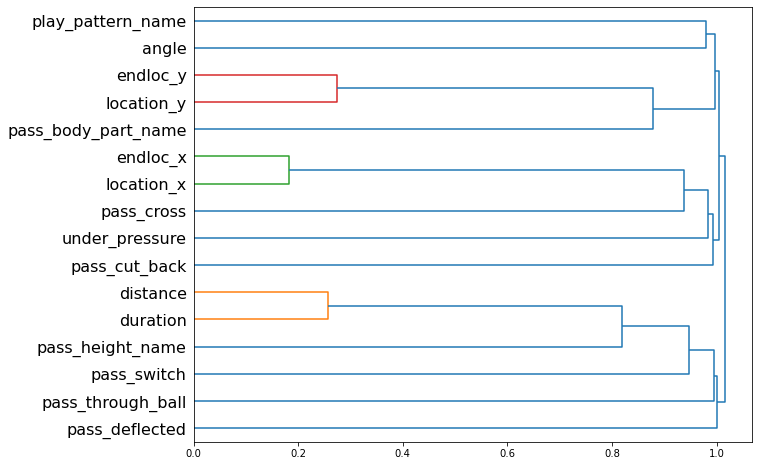

In [71]:
# Make a dendrogram for correlated features
from numpy.random import rand
from numpy.random import seed
import scipy  
from scipy.cluster import hierarchy as hc
seed(42)
copyX = X + rand(*X.shape) / 100000.0
def dendrogram(X):
    corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(10,8))
    dendrogram = hc.dendrogram(z, labels=X.columns, 
          orientation='right', leaf_font_size=16)
    plt.show()
    return
dendrogram(copyX)

In [72]:
# Remove the correlated features and check if the Brier loss reduces.
feats = ['location_x', 'endloc_x',
         'location_y', 'endloc_y',
         'distance', 'duration']
print('original', "{0:.5f}".format(loss))
for feat in feats:
    loss_feats = get_loss(X=X.drop(feat, axis=1))   
    print(feat, "{0:.5f}".format(loss_feats))

original 0.06823
location_x 0.06827
endloc_x 0.06931
location_y 0.06874
endloc_y 0.07324
distance 0.06867
duration 0.07411


In [73]:
# Feature importance extraction

## Define a function to get feature importance using the drop-column method
def get_imp(X, y=y, m=m, cv=cv):
    baseline = get_loss(X=X, y=y, m=m, cv=cv)
    imp = []
    for col in X.columns:
        s = get_loss(X=X.drop(col, axis=1), y=y, m=m, cv=cv)
        change_in_score = s - baseline
        imp.append(change_in_score)
    imp_df = pd.DataFrame(data={'Feature': X.columns, 'Importance': np.array(imp)})
    imp_df = imp_df.set_index('Feature').sort_values('Importance', ascending=False)
    return imp_df

imp1 = get_imp(X=X)
imp1.reset_index().plot('Feature', 'Importance', figsize=(10,6), legend=False);

KeyboardInterrupt: 

In [ ]:
plot_importances(imp1, imp_range=(min(imp1.values), max(imp1.values)))

In [ ]:
# Drop the least 3 important features and check Brier loss again.
X2 = X.drop(['location_x','pass_cut_back','pass_switch'], axis=1)
loss2 = get_loss(X=X2)
print('Brier loss:', "{0:.5f}".format(loss2))

In [ ]:
# Improvement !! Ok...now do a train-test split. Then use an XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

In [ ]:
%%time

xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

In [ ]:
# Do a grid search for the best choice of parameters.

## Create the parameter grid
# # Define function to print the results of the grid search
def print_gs_results(gs, print_all=True):
    if print_all == True:
        print('Grid scores:')
        means = gs.cv_results_['mean_test_score']*-1
        stds = gs.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, gs.cv_results_['params']):
            print("%0.5f (+/-%0.05f) for %r"
                  % (mean, std * 2, params))
        print()
        print('Best:', "{0:.5f}".format(gs.best_score_*-1),'using %s' % gs.best_params_)
    else:
        print('Best:', "{0:.5f}".format(gs.best_score_*-1),'using %s' % gs.best_params_)
    return

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_depth': [i for i in range(3, 5)],
}

## Create the randomised grid search model
## See http://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html
## "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=20, cv=cv, random_state=42, n_jobs=-1,
                         scoring='brier_score_loss', return_train_score=True)

# Fit rgs
rgs.fit(X_train, y_train)

# Print results
print_gs_results(gs=rgs, print_all=False)

In [ ]:
# Some tests of the model

## Define a function to help fit models and print the results
def print_results(xgb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Fit model
    xgb.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

    # Print results
    print('Actual passes:', sum(y_test))
    print('Predicted passes (xgb):', '{0:.2f}'.format(sum(y_pred_proba_xgb)))
    print('Brier loss (xgb):', '{0:.5f}'.format(brier_score_loss(y_test, y_pred_proba_xgb)))
    return

# Evaluate best models on the hold-out set
best_xgb = rgs.best_estimator_

print_results(xgb=best_xgb)
print_results(xgb=xgb)

In [ ]:
calibrated_xgb = CalibratedClassifierCV(rgs.best_estimator_, cv=cv, method='sigmoid')
print_results(xgb=calibrated_xgb)

In [ ]:
filename = 'final_model_sb_360.sav'
pickle.dump(best_xgb, open(filename, 'wb'))

In [ ]:
plot_confusion_matrix(best_xgb, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
skplt.metrics.plot_precision_recall(y_test, calibrated_xgb.predict_proba(X_test))

In [ ]:
len(X2),len(passes)

In [ ]:
# Fit the model to the entire dataset
best_xgb.fit(X2, y)

In [ ]:
pass_final['xp'] = best_xgb.predict_proba(X2)[:,1]
pass_final['name'] = passes['player_name']
pass_final

In [ ]:
# Groupby to get actual and expected pass success
df_sb_events_grouped_pass_completion = pass_final.groupby('name').agg({'duration':'count','success':'sum','xp':'sum'}).reset_index()

df_sb_events_grouped_pass_completion.rename(columns={'duration':'Open Play Passes',
                             'success':'Successful Open Play Passes',
                             'xp':'Expected Pass Success',
                             'name':'player_name'},inplace=True)

df_sb_events_grouped_pass_completion

In [ ]:
# Define 'Pass Completed Above Expected'
df_sb_events_grouped_pass_completion['Pass Completed Above Expected'] = df_sb_events_grouped_pass_completion['Successful Open Play Passes']/df_sb_events_grouped_pass_completion['Expected Pass Success']

df_sb_events_grouped_pass_completion

---

<a id='section6'></a>

## <a id='#section6'>6. Unify Data for Final Dataset</a>

Derived DataFrames from the original `df_sb_events` DataFrame are:
- `df_sb_player_positions`
- `df_sb_player_minutes`
- `df_sb_events_grouped_passing_carrying`
- `df_sb_events_grouped_xt`
- `df_sb_events_grouped_xg`
- `df_sb_events_grouped_defending`
- `df_sb_events_grouped_pass_completion`

<a id='section6.0'></a>

### <a id='#section6.0'>6.0. Import Previous Saved Datasets</a>
Temporary step to bring in previously saved DataFrames with correct data (currently a bug in the notebook).

In [ ]:
#df_sb_player_positions
#df_sb_player_minutes
df_sb_events_grouped_passing_carrying = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_passing.csv')
df_sb_events_grouped_xt = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_xt.csv')
df_sb_events_grouped_xg = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_xg.csv')
df_sb_events_grouped_defending = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_defending.csv')
df_sb_events_grouped_pass_completion = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_pass_completion.csv')

<a id='section6.1'></a>

### <a id='#section6.1'>6.1. Join Datasets</a>

In [ ]:
defenders = df.player_name.unique()
#defenders = df[df.position_name.isin(['Left Center Back','Right Center Back', 'Center Back'])].player_name.unique()
#flagnames = ['Francisco Javier Calvo Quesada','Joshua Kimmich',
#             'Luis Carlos Tejada Hansell',
#             'Michael Lang','Nicolás Alejandro Tagliafico',
#             'Gabriel Iván Mercado','Hörður Björgvin Magnússon','Birkir Már Sævarsson',
#             'Fedor Kudryashov','Éver Maximiliano David Banega','Edson Omar Álvarez Velázquez',
#             'Marcus Rashford', 'İlkay Gündoğan', 'Dylan Bronn']
#defenders = list(set(defenders) - set(flagnames))

defenders

Collecting team open play shots

In [ ]:
teams = df[df.player_name.isin(defenders)].team_name.unique()
teamOPSdf = df[(df.team_name.isin(teams))&(df.shot_type_name=='Open Play')].groupby('team_name').agg({'player_name':'count'}).reset_index()
teamOPSdf.rename(columns={'team_name':'team','player_name':'Open Play Shots'},inplace=True)
teamOPSdf

Combine the separate, aggregrated DataFrames into a single dataframe.

In [ ]:
# Join the Matches DataFrame to the Events DataFrame
df_sb_events_grouped_combined = pd.merge(df_sb_player_minutes, df_sb_player_positions, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_passing_carrying, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_xt, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_xg, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_defending, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = pd.merge(df_sb_events_grouped_combined, df_sb_events_grouped_pass_completion, left_on=['player_name'], right_on=['player_name'], how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.sort_values(['player_name', 'team_name', 'mins_total'], ascending=[True, True, True])
df_sb_events_grouped_combined.head()

In [ ]:
df_sb_events_grouped_combined[df_sb_events_grouped_combined['player_name'] == 'Harry Maguire']

In [ ]:
df_sb_player_positions.shape

In [ ]:
df_sb_events_grouped_combined.shape

In [ ]:
#df_sb_player_positions
#df_sb_player_minutes
df_sb_events_grouped_passing_carrying = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_passing.csv')
df_sb_events_grouped_xt = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_xt.csv')
df_sb_events_grouped_xg = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_xg.csv')
df_sb_events_grouped_defending = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_defending.csv')
df_sb_events_grouped_pass_completion = pd.read_csv(data_dir_sb + '/engineered/combined/sb_360/' + 'sb_events_grouped_pass_completion.csv')

In [ ]:
df_sb_events_grouped_passing_carrying = df_sb_events_grouped_passing_carrying[df_sb_events_grouped_passing_carrying.player_name.isin(defenders)]
df_sb_events_grouped_passing_carrying['Final Third Entries'] = df_sb_events_grouped_passing_carrying['Successful Final Third Passes'] + df_sb_events_grouped_passing_carrying['Final Third Carries']
df_sb_events_grouped_passing_carrying['Progressive Moves'] = df_sb_events_grouped_passing_carrying['Successful Progressive Passes'] + df_sb_events_grouped_passing_carrying['Progressive Carries']

cols = ['Passes',
        'Successful Passes',
        'Open Play Passes',
        'Successful Open Play Passes',
        'Long Passes',
        'Successful Long Passes',
        'Successful Final Third Passes',
        'Under Pressure Passes',
        'Successful Under Pressure Passes',
        'Progressive Passes',
        'Successful Progressive Passes',
        'Total Pass Length', 'Carries',
        'Pass Progressive Distance',
        'Carry Distance',
        'Carry Progressive Distance',
        'Final Third Entries',
        'Progressive Moves'
       ]

df_sb_events_grouped_passing_carrying = df_sb_events_grouped_passing_carrying[['player_name']+cols]

for c in ['Successful Passes','Successful Open Play Passes','Successful Long Passes','Successful Under Pressure Passes',
          'Successful Progressive Passes']:
    if 'Successful' in c:
        cplayer_name = ' '.join(c.split(' ')[1:])
        df_sb_events_grouped_passing_carrying[cplayer_name+' Success %'] = df_sb_events_grouped_passing_carrying[c]*100/df_sb_events_grouped_passing_carrying[cplayer_name]
        df_sb_events_grouped_passing_carrying = df_sb_events_grouped_passing_carrying.drop(columns=cplayer_name)

df_sb_events_grouped_passing_carrying['PPF'] = df_sb_events_grouped_passing_carrying['Pass Progressive Distance']/df_sb_events_grouped_passing_carrying['Total Pass Length']
df_sb_events_grouped_passing_carrying['CPF'] = df_sb_events_grouped_passing_carrying['Carry Progressive Distance']/df_sb_events_grouped_passing_carrying['Carry Distance']
df_sb_events_grouped_passing_carrying = df_sb_events_grouped_passing_carrying.drop(columns=['Pass Progressive Distance','Carry Progressive Distance'])
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(df_sb_events_grouped_passing_carrying[df_sb_events_grouped_passing_carrying.player_name.isin(defenders)],how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(teamOPSdf,how='left')
# df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(passangles,how='left')
# df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(ppassangles,how='left')
df_sb_events_grouped_combined = df_sb_events_grouped_combined.merge(xpdf,how='left')
df_sb_events_grouped_combined['Successful Passes and Carries'] = df_sb_events_grouped_combined['Successful Passes'] + df_sb_events_grouped_combined['Carries']

for cols in ['xT', 'xT Facilitated']:
    df_sb_events_grouped_combined[cols] = df_sb_events_grouped_combined[cols]*100/df_sb_events_grouped_combined['Successful Passes and Carries']

for cols in ['xGBuildup', 'xGChain']:
    df_sb_events_grouped_combined[cols] = df_sb_events_grouped_combined[cols]*10/df_sb_events_grouped_combined['Open Play Shots']

per90cols = ['Padj_Defensive Acts',
             'Turnovers',
             'Aerial Challenges',
             'Dribbles',
             'Padj_Pressures',
             'Padj_Successful Pressures',
             'Successful Passes',
             'Successful Long Passes',
             'Successful Final Third Passes',
             'Successful Under Pressure Passes',
             'Successful Progressive Passes',
             'Total Pass Length',
             'Carries',
             'Carry Distance',
             'Final Third Entries',
            #'Progressive Passes',
            #'Progressive Carries',
             'Progressive Moves',
             'Successful Passes',
             'Successful Open Play Passes',
             'Successful Carries',
             'Successful Progressive Carries',
             'Successful Passes and Carries',
            ]

for col in per90cols:
    df_sb_events_grouped_combined[col] = df_sb_events_grouped_combined[col]/df_sb_events_grouped_combined['mins_total']*90
    df_sb_events_grouped_combined[col+'_p90'] = df_sb_events_grouped_combined[col]

df_sb_events_grouped_combined.drop(columns='Open Play Shots',inplace=True)
df_sb_events_grouped_combined['Turnovers per 100 Touches'] = df_sb_events_grouped_combined['Turnovers']*100/(df_sb_events_grouped_combined['Carries'] + df_sb_events_grouped_combined['Dribbles'])

for c in df_sb_events_grouped_combined.columns.tolist()[3:]:
    df_sb_events_grouped_combined['Percentile '+c] = df_sb_events_grouped_combined[c].rank(pct = True)

df_sb_events_grouped_combined.head()

In [ ]:
# Temporary step: Importing an previously saved version
#df_sb_events_grouped_combined = pd.read_csv(data_dir + '/sb/engineered/combined/sb_360/' + 'sb_events_agg_all.csv')

In [ ]:
len(df_sb_events_grouped_combined)

<a id='section6.3'></a>

### <a id='#section6.3'>6.3. Rename Columns</a>
Final cleaning of dataset by renaming the columns

In [ ]:
df_sb_events_grouped_combined.head()

In [ ]:
df_sb_events_grouped_combined.shape

In [ ]:
df_sb_events_grouped_combined.columns

In [ ]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_sb_events_grouped_combined.dtypes)

In [ ]:
# To add
#age	dob	pob	cob	second_citizenship	current_club	current_club_country	height	foot	market_value_euros	market_value_pounds	joined	age_when_joining	years_since_joining	contract_expires	years_until_contract_expiry	contract_option	on_loan_from	on_loan_from_country	loan_contract_expiry	player_agent

In [ ]:
# Rename columns
df_sb_events_grouped_combined = (df_sb_events_grouped_combined
                                     .rename(columns={'player_name': 'player',
                                                      'mins_total': 'mins_total',
                                                      'team_name': 'team',
                                                      'primary_position_name': 'position',
                                                      'Passes': 'passes',
                                                      'Successful Passes': 'completed_passes',
                                                      'Open Play Passes_x': 'open_play_passes',
                                                      'Successful Open Play Passes_x': 'completed_open_play_passes',
                                                      'Short Passes': 'short_passes',
                                                      'Successful Short Passes': 'completed_short_passes',
                                                      'Medium Passes': 'medium_passes',
                                                      'Successful Medium Passes': 'completed_medium_passes',
                                                      'Long Passes': 'long_passes',
                                                      'Successful Long Passes': 'completed_long_passes',
                                                      'Final Third Passes': 'final_third_pass',
                                                      'Successful Final Third Passes': 'completed_final_third_pass',
                                                      'Penalty Area Passes': 'penalty_area_passes',
                                                      'Successful Penalty Area Passes': 'completed_penalty_area_passes',
                                                      'Under Pressure Passes': 'under_pressure_passes',
                                                      'Successful Under Pressure Passes': 'completed_under_pressure_passes',
                                                      'Throughballs': 'throughballs',
                                                      'Successful Throughballs': 'completed_throughballs',
                                                      'Switches': 'switches',
                                                      'Successful Switches': 'completed_switches',
                                                      'Crosses': 'crosses',
                                                      'Successful Crosses': 'completed_crosses',
                                                      'Penalty Area Crosses': 'penalty_area_crosses',
                                                      'Successful Penalty Area Crosses': 'completed_penalty_area_crosses',
                                                      'Progressive Passes': 'progressive_passes',
                                                      'Successful Progressive Passes': 'completed_progressive_passes',
                                                      'Total Pass Length': 'total_pass_distance',
                                                      'Pass Progressive Distance': 'progressive_pass_distance',
                                                      'Carries': 'carries',
                                                      'Successful Carries': 'completed_carries',
                                                      'Final Third Carries': 'final_third_carries',
                                                      'Successful Final Third Carries': 'completed_final_third_carries',
                                                      'Progressive Carries': 'progressive_Carries',
                                                      'Successful Progressive Carries': 'completed_progressive_carries',
                                                      'Carry Distance': 'carry_distance',
                                                      'Carry Progressive Distance': 'progressive_carry_distance',
                                                      'xT': 'xt',
                                                      'xT Facilitated': 'xt_faciliated',
                                                      'xGBuildup': 'xgbuildup',
                                                      'xGChain': 'xgchain',
                                                      'Padj_Defensive Acts': 'padj_defensive_acts',
                                                      'Turnovers': 'turnovers',
                                                      'Aerial Challenges': 'aerial_challenges',
                                                      'Aerial Win %': 'aerial_win_%',
                                                      'True Tackle Win%': 'true_tackle_win_%',
                                                      'Padj_Pressures': 'padj_pressures',
                                                      'Padj_Successful Pressures': 'padj_completed_pressures',
                                                      'Dribbles': 'dribbles',
                                                      'Padj_Tackles and Interceptions': 'padj_tackles_and_interceptions',
                                                      'Tack/DP %': 'tackle/dp_%',
                                                      'Expected Pass Success': 'completed_expected_passes',
                                                      'Pass Completed Above Expected': 'passes_completed_above_expected',
                                                      'Successful Open Play Passes': 'completed_open_play_passes',
                                                      'Final Third Entries': 'final_third_entries',
                                                      'Progressive Moves': 'progressive_moves',
                                                      'Passes Success %': 'completed_passes_%',
                                                      'Open Play Passes Success %': 'completed_open_play_passes_%',
                                                      'Long Passes Success %': 'completed_long_passes_%',
                                                      'Under Pressure Passes Success %': 'completed_under_pressure_passes_%',
                                                      'Progressive Passes Success %': 'completed_progressive_passes_%',
                                                      'PPF': 'ppf',
                                                      'CPF': 'cpf',
                                                      'Open Play Passes': 'open_play_passes',
                                                      'Successful Passes and Carries': 'completed_passes_and_carries',                                         
                                                      'Padj_Defensive Acts_p90': 'padj_defensive_acts_p90',
                                                      'Turnovers_p90': 'turnovers_p90',
                                                      'Aerial Challenges_p90': 'aerial_challenges_p90',
                                                      'Dribbles_p90': 'dribbles_p90',
                                                      'Padj_Pressures_p90': 'padj_presures_p90',
                                                      'Padj_Successful Pressures_p90': 'padj_completed_pressures_p90',
                                                      'Successful Passes_p90': 'completed_passes_p90',
                                                      'Successful Long Passes_p90': 'completed_long_passes_p90',
                                                      'Successful Final Third Passes_p90': 'completed_final_thirdpasses_p90',
                                                      'Successful Under Pressure Passes_p90': 'completed_under_pressure_passes_p90',                                           
                                                      'Successful Progressive Passes_p90': 'completed_progressive_passes_p90',
                                                      'Total Pass Length_p90': 'total_pass_length_p90',
                                                      'Carries_p90': 'carries_p90',                                             
                                                      'Carry Distance_p90': 'carry_distance_p90',
                                                      'Final Third Entries_p90': 'final_third_entries_p90',
                                                      'Progressive Moves_p90': 'progressive_moves_p90',
                                                      'Successful Open Play Passes_p90': 'completed_open_play_passes_p90',
                                                      'Successful Carries_p90': 'completed_carries_p90',
                                                      'Successful Progressive Carries_p90': 'completed_progressive_carries_p90',
                                                      'Successful Passes and Carries_p90': 'completed_passes_and_carries_p90',
                                                      'Turnovers per 100 Touches': 'turnovers_per_100_touches',
                                                      'Percentile primary_position_name': 'percentile_primary_position_name',
                                                      'Percentile Passes': 'percentile_passes',                                                
                                                      'Percentile Successful Passes': 'percentile_completed_passes',
                                                      'Percentile Open Play Passes_x': 'percentile_open_play_Passes',
                                                      'Percentile Successful Open Play Passes_x': 'percentile_completed_open_play_passes',                                             
                                                      'Percentile Short Passes': 'percentile_short_passes',
                                                      'Percentile Successful Short Passes': 'percentile_completed_short_passes',
                                                      'Percentile Medium Passes': 'percentile_medium_passes',
                                                      'Percentile Successful Medium Passes': 'percentile_completed_medium_passes',
                                                      'Percentile Long Passes': 'percentile_long_passes',
                                                      'Percentile Successful Long Passes': 'percentile_completed_long_passes',
                                                      'Percentile Final Third Passes': 'percentile_final_third_passes',
                                                      'Percentile Successful Final Third Passes': 'percentile_completed_final_third_passes',
                                                      'Percentile Penalty Area Passes': 'percentile_penalty_area_passes',
                                                      'Percentile Successful Penalty Area Passes': 'percentile_completed_penalty_area_passes',
                                                      'Percentile Under Pressure Passes': 'percentile_under_pressure_passes',
                                                      'Percentile Successful Under Pressure Passes': 'percentile_completed_under_pressure_passes',
                                                      'Percentile Throughballs': 'percentile_throughballs',
                                                      'Percentile Successful Throughballs': 'percentile_completed_throughballs',
                                                      'Percentile Switches': 'percentile_switches',
                                                      'Percentile Successful Switches': 'percentile_completed_switches',
                                                      'Percentile Crosses': 'percentile_crosses',
                                                      'Percentile Successful Crosses': 'percentile_completes_crosses',
                                                      'Percentile Penalty Area Crosses': 'percentile_penalty_area_crosses',
                                                      'Percentile Successful Penalty Area Crosses': 'percentile_completed_penalty_area_crosses',                                           
                                                      'Percentile Progressive Passes': 'percentile_progressive_passes',
                                                      'Percentile Successful Progressive Passes': 'percentile_completed_progressive_passes',
                                                      'Percentile Total Pass Length': 'percentile_total_pass_length',                                             
                                                      'Percentile Pass Progressive Distance': 'percentile_pass_progressive_distance',
                                                      'Percentile Carries': 'percentile_carries',
                                                      'Percentile Successful Carries': 'percentile_completed_carries',
                                                      'Percentile Final Third Carries': 'percentile_final_third_carries',
                                                      'Percentile Successful Final Third Carries': 'percentile_completed_final_third_Carries',
                                                      'Percentile Progressive Carries': 'percentile_progressive_carries',
                                                      'Percentile Successful Progressive Carries': 'percentile_completed_progressive_carries',
                                                      'Percentile Carry Distance': 'percentile_carry_distance',
                                                      'Percentile Carry Progressive Distance': 'percentile_progressive_carry_distance',
                                                      'Percentile xT': 'percentile_xt',                                                
                                                      'Percentile xT Facilitated': 'percentile_xt_facilitated',
                                                      'Percentile xGBuildup': 'percentile_xgbuildup',
                                                      'Percentile xGChain': 'percentile_xgchain',                                             
                                                      'Percentile team': 'percentile_team',
                                                      'Percentile Padj_Defensive Acts': 'percentile_padj_defensive_acts',
                                                      'Percentile Turnovers': 'percentile_turnovers',
                                                      'Percentile Aerial Challenges': 'percentile_aerial_challenges',
                                                      'Percentile Aerial Win %': 'percentile_aerial_win_%',
                                                      'Percentile True Tackle Win%': 'percentile_true_tackle_win_%',
                                                      'Percentile Padj_Pressures': 'percentile_padj_pressures',
                                                      'Percentile Padj_Successful Pressures': 'percentile_padj_completed_pressures',
                                                      'Percentile Dribbles': 'percentile_dribbles',
                                                      'Percentile Padj_Tackles and Interceptions': 'percentile_padj_tackles_and_interceptions',
                                                      'Percentile Tack/DP %': 'percentile_tack/dp_%',
                                                      'Percentile Open Play Passes_y': 'percentile_',
                                                      'Percentile Successful Open Play Passes_y': 'percentile_completed_open_play_passes',
                                                      'Percentile Expected Pass Success': 'percentile_completed_expected_pass',
                                                      'Percentile Pass Completed Above Expected': 'percentile_pass_completed_above_expected',
                                                      'Percentile Successful Open Play Passes': 'percentile_open_play_passes',
                                                      'Percentile Final Third Entries': 'percentile_final_third_entries',
                                                      'Percentile Progressive Moves': 'percentile_progressive_moves',
                                                      'Percentile Passes Success %': 'percentile_completed_passes_%',
                                                      'Percentile Open Play Passes Success %': 'percentile_completed_open_play_passes_%',                                           
                                                      'Percentile Long Passes Success %': 'percentile_completedlong_passes_%_',
                                                      'Percentile Under Pressure Passes Success %': 'percentile_completed_under_Pressure_passes_%',
                                                      'Percentile Progressive Passes Success %': 'percentile_completed_progressive_passes_%',
                                                      'Percentile PPF': 'percentile_ppf',
                                                      'Percentile CPF': 'percentile_cpf',
                                                      'Percentile Open Play Passes': 'percentile_open_play_passes',
                                                      'Percentile Successful Passes and Carries': 'percentile_completed_passes_and_carries',
                                                      'Percentile Padj_Defensive Acts_p90': 'percentile_padj_defensive_acts_p90',                                                
                                                      'Percentile Turnovers_p90': 'percentile_turnovers_p90',
                                                      'Percentile Aerial Challenges_p90': 'percentile_aerial_challenges_p90',
                                                      'Percentile Dribbles_p90': 'percentile_dribbles_p90',                                             
                                                      'Percentile Padj_Pressures_p90': 'percentile_padj_pressures_p90',
                                                      'Percentile Padj_Successful Pressures_p90': 'percentile_padj_completed_pressures_p90',
                                                      'Percentile Successful Passes_p90': 'percentile_completed_passes_p90',
                                                      'Percentile Successful Long Passes_p90': 'percentile_completed_long_passes_p90',
                                                      'Percentile Successful Final Third Passes_p90': 'percentile_completed_final_third_passes_p90',
                                                      'Percentile Successful Under Pressure Passes_p90': 'percentile_percentile_completed_under_pressure_passes_p90',
                                                      'Percentile Successful Progressive Passes_p90': 'percentile_completed_progressive_passes_p90',
                                                      'Percentile Total Pass Length_p90': 'percentile_total_pass_distance_p90',
                                                      'Percentile Carries_p90': 'percentile_carries_p90',
                                                      'Percentile Carry Distance_p90': 'percentile_carry_distance_p90',
                                                      'Percentile Final Third Entries_p90': 'percentile_final_third_entries_p90',
                                                      'Percentile Progressive Moves_p90': 'percentile_progressive_moves_p90',
                                                      'Percentile Successful Open Play Passes_p90': 'percentile_completed_open_play_passes_p90',
                                                      'Percentile Successful Carries_p90': 'percentile_completed_completed_carries_p90',
                                                      'Percentile Successful Progressive Carries_p90': 'percentile_completed_progressive_carries_p90',
                                                      'Percentile Successful Passes and Carries_p90': 'percentile_completed_passes_and_carries_p90',
                                                      'Percentile Turnovers per 100 Touches': 'percentile_turnovers_per_100_touches'
                                                     }
                                            )
                                )

# Display DataFrame
df_sb_events_grouped_combined.head()

In [ ]:
# Drop columns
df_sb_events_grouped_combined = (df_sb_events_grouped_combined
                                     .drop(['Open Play Passes_y',
                                            'Successful Open Play Passes_y',
                                            'percentile_team'
                                           ], axis=1
                                          )
                                )

# Display DataFrame
df_sb_events_grouped_combined.head()

<a id='section6.2'></a>

### <a id='#section6.2'>6.2. Filter for Center Backs</a>
Filter for only defenders

In [ ]:
#F ilter for Center Backs
df_sb_events_grouped_combined_center_backs = df_sb_events_grouped_combined[(df_sb_events_grouped_combined['position'] == 'Left Center Back') | (df_sb_events_grouped_combined['position'] == 'Center Back') | (df_sb_events_grouped_combined['position'] == 'Right Center Back')]

# Display DataFrame
df_sb_events_grouped_combined_center_backs.head()

In [ ]:
len(df_sb_events_grouped_combined_defenders)

---

<a id='section7'></a>

## <a id='#section7'>7. Export Final DataFrames</a>

In [ ]:
# Export DataFrames
df_sb_events.to_csv(data_dir + '/export/' + '/sb_events.csv', index=None, header=True)
df_sb_events_grouped_combined.to_csv(data_dir + '/export/' + '/sb_events_agg_all.csv', index=None, header=True)
df_sb_events_grouped_combined_center_backs.to_csv(data_dir + '/export/' + '/sb_events_agg_center_backs.csv', index=None, header=True)

---

<a id='section8'></a>

## <a id='#section8'>8. Subset DataFrames</a>
The following code creates DataFrames for additional Tableau visualisation that are not the focus of this task submission, but are included for reference and may be used if there is sufficient time.

These DataFrames include bespoke datasets for the following visualisations:
- Radar
- Passing Matrix
- Passing Network

### <a id='#section8.1'>8.1. Radar Data</a>

In [ ]:
df_sb_radar = df_sb_events_grouped_combined

In [ ]:
df_sb_radar.head()

#### Filter for Center Backs¶

In [ ]:
# Filter for Center Backs
df_sb_radar = df_sb_radar[(df_sb_radar['position'] == 'Left Center Back') | (df_sb_radar['position'] == 'Center Back') | (df_sb_radar['position'] == 'Right Center Back')]

#### Determine Min and Max of Selected Attributes

In [ ]:
#

## Min
min_completed_op_passes_p90 = df_sb_radar['completed_open_play_passes_p90'].min()
min_completed_progressive_passes_p90 = df_sb_radar['completed_progressive_passes_p90'].min()
min_completed_pass_percentage_completion = df_sb_radar['completed_passes_%'].min()
min_completed_pressure_pass_percentage_completion = df_sb_radar['completed_under_pressure_passes_%'].min()
min_completed_carries_p90 = df_sb_radar['completed_carries_p90'].min()
min_completed_progressive_carries_p90 = df_sb_radar['completed_progressive_carries_p90'].min()
min_carry_distance_p90 = df_sb_radar['carry_distance_p90'].min()
min_xgbuildup = df_sb_radar['xgbuildup'].min()
min_xt = df_sb_radar['xt'].min()
min_padj_tackles_and_interceptions = df_sb_radar['padj_tackles_and_interceptions'].min()
min_tack_dp_percentage_completion = df_sb_radar['tackle/dp_%'].min()
min_aerial_win_percentage_completion = df_sb_radar['aerial_win_%'].min()

## Max
max_completed_op_passes_p90 = df_sb_radar['completed_open_play_passes_p90'].max()
max_completed_progressive_passes_p90 = df_sb_radar['completed_progressive_passes_p90'].max()
max_completed_pass_percentage_completion = df_sb_radar['completed_passes_%'].max()
max_completed_pressure_pass_percentage_completion = df_sb_radar['completed_under_pressure_passes_%'].max()
max_completed_carries_p90 = df_sb_radar['completed_carries_p90'].max()
max_completed_progressive_carries_p90 = df_sb_radar['completed_progressive_carries_p90'].max()
max_carry_distance_p90 = df_sb_radar['carry_distance_p90'].max()
max_xgbuildup = df_sb_radar['xgbuildup'].max()
max_xt = df_sb_radar['xt'].max()
max_padj_tackles_and_interceptions = df_sb_radar['padj_tackles_and_interceptions'].max()
max_tack_dp_percentage_completion = df_sb_radar['tackle/dp_%'].max()
max_aerial_win_percentage_completion = df_sb_radar['aerial_win_%'].max()

## Manual Max Changes - for normalisation
# max_completed_op_passes_p90 = 102.857
# max_completed_carries_p90 = 123.75
# max_carry_distance_p90 = 1574.36


"""
## All custom max - not used
max_completed_op_passes_p90 = 25.0
max_completed_pass_percentage_completion = 100.0
max_completed_pressure_pass_percentage_completion = 100.0
max_completed_carries_p90 = 100.0
max_completed_progressive_carries_p90 = 50.0
max_carry_distance_p90 = 850.0
max_xgbuildup = 0.5 
max_xt = 4.0
max_padj_tackles_and_interceptions = 40.0
max_tack_dp_percentage_completion = 100.0
max_aerial_win_percentage_completion = 100.0
"""

In [ ]:
## Print statements
print(f'completed_op_passes_p90 is {min_completed_op_passes_p90:.1f} and the maximum value is {max_completed_op_passes_p90:.1f}')
print(f'completed_pass_% is {min_completed_pass_percentage_completion:.1f} and the maximum value is {max_completed_pass_percentage_completion:.1f}')
print(f'completed_pressure_pass_% is {min_completed_pressure_pass_percentage_completion:.1f} and the maximum value is {max_completed_pressure_pass_percentage_completion:.1f}')
print(f'completed_carries_p90 is {min_completed_carries_p90:.1f} and the maximum value is {max_completed_carries_p90:.1f}')
print(f'completed_progressive_carries_p90 is {min_completed_progressive_carries_p90:.1f} and the maximum value is {max_completed_progressive_carries_p90:.1f}')
print(f'carry_distance_p90 is {min_carry_distance_p90:.1f} and the maximum value is {max_carry_distance_p90:.1f}')
print(f'xgbuildup is {min_xgbuildup:.1f} and the maximum value is {max_xgbuildup:.1f}')
print(f'xt is {min_xt:.1f} and the maximum value is {max_xt:.1f}')
print(f'padj_tackles_and_interceptions is {min_padj_tackles_and_interceptions:.1f} and the maximum value is {max_padj_tackles_and_interceptions:.1f}')
print(f'tack_dp_percentage_completion is {min_tack_dp_percentage_completion:.1f} and the maximum value is {max_tack_dp_percentage_completion:.1f}')
print(f'aerial_win_percentage_completion is {min_aerial_win_percentage_completion:.1f} and the maximum value is {max_aerial_win_percentage_completion:.1f}')

#### Determine Normalise Columns

In [ ]:
# Normalise columns
df_sb_radar['completed_open_play_passes_p90_normalised'] = df_sb_radar['completed_open_play_passes_p90'].apply(lambda x: (x - min_completed_op_passes_p90) / (max_completed_op_passes_p90 - min_completed_op_passes_p90))
df_sb_radar['completed_progressive_passes_p90_normalised'] = df_sb_radar['completed_progressive_passes_p90'].apply(lambda x: (x - min_completed_progressive_passes_p90) / (max_completed_progressive_passes_p90 - min_completed_progressive_passes_p90))
df_sb_radar['completed_passes_%_normalised'] = df_sb_radar['completed_passes_%'].apply(lambda x: (x - min_completed_pass_percentage_completion) / (max_completed_pass_percentage_completion - min_completed_pass_percentage_completion))
df_sb_radar['completed_under_pressure_passes_%_normalised'] = df_sb_radar['completed_under_pressure_passes_%'].apply(lambda x: (x - min_completed_pressure_pass_percentage_completion) / (max_completed_pressure_pass_percentage_completion - min_completed_pressure_pass_percentage_completion))
df_sb_radar['completed_carries_p90_normalised'] = df_sb_radar['completed_carries_p90'].apply(lambda x: (x - min_completed_carries_p90) / (max_completed_carries_p90 - min_completed_carries_p90))
df_sb_radar['completed_progressive_carries_p90_normalised'] = df_sb_radar['completed_progressive_carries_p90'].apply(lambda x: (x - min_completed_progressive_carries_p90) / (max_completed_progressive_carries_p90 - min_completed_progressive_carries_p90))
df_sb_radar['carry_distance_p90_normalised'] = df_sb_radar['carry_distance_p90'].apply(lambda x: (x - min_carry_distance_p90) / (max_carry_distance_p90 - min_carry_distance_p90))
df_sb_radar['xgbuildup_normalised'] = df_sb_radar['xgbuildup'].apply(lambda x: (x - min_xgbuildup) / (max_xgbuildup - min_xgbuildup))
df_sb_radar['xt_normalised'] = df_sb_radar['xt'].apply(lambda x: (x - min_xt) / (max_xt - min_xt))
df_sb_radar['padj_tackles_and_interceptions_normalised'] = df_sb_radar['padj_tackles_and_interceptions'].apply(lambda x: (x - min_padj_tackles_and_interceptions) / (max_padj_tackles_and_interceptions - min_padj_tackles_and_interceptions))
df_sb_radar['tackle/dp_%_normalised'] = df_sb_radar['tackle/dp_%'].apply(lambda x: (x - min_tack_dp_percentage_completion) / (max_tack_dp_percentage_completion - min_tack_dp_percentage_completion))
df_sb_radar['aerial_win_%_normalised'] = df_sb_radar['aerial_win_%'].apply(lambda x: (x - min_aerial_win_percentage_completion) / (max_aerial_win_percentage_completion - min_aerial_win_percentage_completion))

In [ ]:
df_sb_radar[df_sb_radar['player'] == 'Sergio Ramos García']

#### Select Columns of Interest

In [ ]:
#

## Define columns
cols = ['player',
        'mins_total',
        'team',
        'position',
        'completed_open_play_passes_p90', 
        'completed_progressive_passes_p90',
        'completed_passes_%',
        'completed_under_pressure_passes_%',
        'completed_carries_p90',
        'completed_progressive_carries_p90',
        'carry_distance_p90',
        'xgbuildup',
        'xt',
        'padj_tackles_and_interceptions',
        'tackle/dp_%',
        'aerial_win_%',
        'completed_open_play_passes_p90_normalised', 
        'completed_progressive_passes_p90_normalised',
        'completed_passes_%_normalised',
        'completed_under_pressure_passes_%_normalised',
        'completed_carries_p90_normalised',
        'completed_progressive_carries_p90_normalised',
        'carry_distance_p90_normalised',
        'xgbuildup_normalised',
        'xt_normalised',
        'padj_tackles_and_interceptions_normalised',
        'tackle/dp_%_normalised',
        'aerial_win_%_normalised'
       ]

## Select columns of interest
df_sb_radar_select = df_sb_radar[cols]

## Drop duplicate column (duplicate 'team', temporary solution, needs to be moved up)
df_sb_radar_select = df_sb_radar_select.loc[:,~df_sb_radar_select.columns.duplicated()]

## 
df_sb_radar_select.head()

#### Melt DataFrame

In [ ]:
df_sb_radar_melt = pd.melt(df_sb_radar_select, id_vars=['player', 'mins_total', 'team', 'position'], var_name='attribute_name', value_name='value')

In [ ]:
df_sb_radar_melt.head()

In [ ]:
df_sb_radar_melt.shape

In [ ]:
df_sb_radar.shape

#### Export Final Dataset

In [ ]:
# Export DataFrames
df_sb_radar_melt.to_csv(data_dir + '/export/' + '/sb_events_agg_all_long.csv', index=None, header=True)

### <a id='#section8.2'>8.2. Passing Matrix Data</a>

##### Copy the Events DataFrame

In [ ]:
df1 = df_sb_events.copy()

##### Isolate In-Play Events
Remove Non-Event rows to only include player's actions i.e. removing line ups, halves, etc.

In [ ]:
# List unique values in the df_sb['type.name'] column
df1['type_name'].unique()

In [ ]:
lst_events = ['Pass', 'Ball Receipt*', 'Carry', 'Duel', 'Miscontrol', 'Pressure', 'Ball Recovery', 'Dribbled Past', 'Dribble', 'Shot', 'Block', 'Goal Keeper', 'Clearance', 'Dispossessed', 'Foul Committed', 'Foul Won', 'Interception', 'Shield', 'Half End', 'Substitution', 'Tactical Shift', 'Injury Stoppage', 'Player Off', 'Player On', 'Offside', 'Referee Ball-Drop', 'Error']

In [ ]:
df1= df1[df1['type_name'].isin(lst_events)]

In [ ]:
df1['df_name'] = 'df1'

In [ ]:
df2 = df_sb_events.copy()

In [ ]:
df2['df_name'] = 'df2'

##### Concatanate DataFrames

In [ ]:
df_sb_events_passing = pd.concat([df1, df2])

In [ ]:
df_sb_events_passing.shape

##### ...

In [ ]:
df_sb_events_passing['Pass_X'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_x'], df_sb_events_passing['pass_end_location_x'])
df_sb_events_passing['Pass_Y'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_y'], df_sb_events_passing['pass_end_location_y'])
df_sb_events_passing['Carry_X'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_x'], df_sb_events_passing['carry_end_location_x'])
df_sb_events_passing['Carry_Y'] = np.where(df_sb_events_passing['df_name'] == 'df1', df_sb_events_passing['location_y'], df_sb_events_passing['carry_end_location_y'])

##### Export Dataset

In [ ]:
# Export 
#df_sb_events_passing.to_csv(data_dir_sb + '/events/engineered/' + '/sb_events_passing_matrix.csv', index=None, header=True)

# Export 
df_sb_events_passing.to_csv(data_dir + '/export/' + '/sb_events_passing_matrix.csv', index=None, header=True)

### <a id='#section8.3'>8.3. Create Passing Network Data</a>

See: https://community.tableau.com/s/question/0D54T00000C6YbE/football-passing-network

In [ ]:
df_sb_pass_network = df_sb_events_passing.copy()

In [ ]:
df_sb_pass_network = df_sb_pass_network[df_sb_pass_network['type_name'] == 'Pass']

In [ ]:
df_sb_pass_network['player_recipient'] = np.where(df_sb_pass_network['df_name'] == 'df1', df_sb_pass_network['player_name'], df_sb_pass_network['pass_recipient_name'])

In [ ]:
df_sb_pass_network.head()

In [ ]:
sorted(df_sb_pass_network.columns)

In [ ]:
df_sb_pass_network.shape

In [ ]:
# Select columns of interest

## Define columns
cols = ['df_name',
        'id',
        'index',
        'competition_name',
        'season_name',
        'match_date',
        'kick_off',
        'Full_Fixture_Date',
        'Team',
        'Opponent',
        'home_team_home_team_name',
        'away_team_away_team_name',
        'home_score',
        'away_score',
        'player_recipient',
        'player_name',
        'pass_recipient_name',
        'position_id',
        'position_name',
        'type_name',
        'pass_type_name',
        'pass_outcome_name',
        'location_x',
        'location_y', 
        'pass_end_location_x',
        'pass_end_location_y', 
        'carry_end_location_x',
        'carry_end_location_y',
        'Pass_X',
        'Pass_Y',
        'Carry_X',
        'Carry_Y'
       ]

##
df_sb_pass_network_select = df_sb_pass_network[cols]

In [ ]:
df_sb_pass_network_select['pass_to_from'] = df_sb_pass_network_select['player_name'] + ' - ' + df_sb_pass_network_select['pass_recipient_name']

In [ ]:
# List unique values in the df_sb_pass_network_select['pass.outcome.name'] column
df_sb_pass_network_select['pass_outcome_name'].unique()

In [ ]:
df_sb_pass_network_select = df_sb_pass_network_select[df_sb_pass_network_select['pass_outcome_name'].isnull()]

In [ ]:
df_sb_pass_network_select.shape

In [ ]:
df_sb_pass_network_select = df_sb_pass_network_select.sort_values(['season_name', 'match_date', 'kick_off', 'Full_Fixture_Date', 'index', 'id', 'df_name'], ascending=[True, True, True, True, True, True, True])

In [ ]:
df_sb_pass_network_select['Pass_X'] = df_sb_pass_network_select['Pass_X'].astype(str).astype(float)
df_sb_pass_network_select['Pass_Y'] = df_sb_pass_network_select['Pass_Y'].astype(str).astype(float)
df_sb_pass_network_select['Carry_X'] = df_sb_pass_network_select['Carry_X'].astype(str).astype(float)
df_sb_pass_network_select['Carry_Y'] = df_sb_pass_network_select['Carry_Y'].astype(str).astype(float)
df_sb_pass_network_select['location_x'] = df_sb_pass_network_select['location_x'].astype(str).astype(float)
df_sb_pass_network_select['location_y'] = df_sb_pass_network_select['location_y'].astype(str).astype(float)
df_sb_pass_network_select['pass_end_location_x'] = df_sb_pass_network_select['pass_end_location_x'].astype(str).astype(float)
df_sb_pass_network_select['pass_end_location_y'] = df_sb_pass_network_select['pass_end_location_y'].astype(str).astype(float)
df_sb_pass_network_select['carry_end_location_x'] = df_sb_pass_network_select['carry_end_location_x'].astype(str).astype(float)
df_sb_pass_network_select['carry_end_location_y'] = df_sb_pass_network_select['carry_end_location_y'].astype(str).astype(float)

In [ ]:
df_sb_pass_network_select.dtypes

In [ ]:
df_sb_pass_network_select.head()

In [ ]:
#

##
df_sb_pass_network_grouped = (df_sb_pass_network_select
                                  .groupby(['competition_name',
                                            'season_name',
                                            'match_date',
                                            'kick_off',
                                            'Full_Fixture_Date',
                                            'Team',
                                            'Opponent',
                                            'home_team_home_team_name',
                                            'away_team_away_team_name',
                                            'home_score',
                                            'away_score',
                                            'pass_to_from',
                                            'player_name',
                                            'pass_recipient_name',
                                            'player_recipient'
                                           ])
                                  .agg({'pass_to_from': ['count']
                                       })
                             )

##
df_sb_pass_network_grouped.columns = df_sb_pass_network_grouped.columns.droplevel(level=0)

##
df_sb_pass_network_grouped = df_sb_pass_network_grouped.reset_index()

## 
df_sb_pass_network_grouped.columns = ['competition_name',
                                      'season_name',
                                      'match_date',
                                      'kick_off',
                                      'full_fixture_date',
                                      'team',
                                      'opponent',
                                      'home_team_name',
                                      'away_team_name',
                                      'home_score',
                                      'away_score',
                                      'pass_to_from',
                                      'player_name',
                                      'pass_recipient_name',
                                      'player_recipient',
                                      'count_passes',
                                     ]

##
#df_sb_pass_network_grouped['count_passes'] = df_sb_pass_network_grouped['count_passes'] / 2

##
df_sb_pass_network_grouped = df_sb_pass_network_grouped.sort_values(['season_name', 'match_date', 'kick_off', 'full_fixture_date', 'team', 'opponent', 'pass_to_from'], ascending=[True, True, True, True, True, True, True])

##
df_sb_pass_network_grouped.head()

In [ ]:
df_sb_pass_network_grouped.shape

In [ ]:
# Select columns of interest

## Define columns
cols = ['Full_Fixture_Date',
        'player_name',
        'position_id',
        'position_name',
        'Pass_X',
        'Pass_Y'
       ]

##
df_sb_pass_network_avg_pass = df_sb_pass_network_select[cols]

In [ ]:
df_sb_pass_network_avg_pass 

In [ ]:
#

##
df_sb_pass_network_avg_pass_grouped = (df_sb_pass_network_avg_pass 
                                          .groupby(['Full_Fixture_Date',
                                                    'player_name',
                                                    'position_id',
                                                    'position_name',
                                                   ])
                                          .agg({'Pass_X': ['mean'],
                                                'Pass_Y': ['mean']
                                               })
                                     )

##
df_sb_pass_network_avg_pass_grouped.columns = df_sb_pass_network_avg_pass_grouped .columns.droplevel(level=0)

##
df_sb_pass_network_avg_pass_grouped = df_sb_pass_network_avg_pass_grouped.reset_index()

## 
df_sb_pass_network_avg_pass_grouped.columns = ['full_fixture_date',
                                               'player_name',
                                               'position_id',
                                               'position_name',
                                               'avg_location_pass_x',
                                               'avg_location_pass_y'
                                     ]

##
df_sb_pass_network_avg_pass_grouped['avg_location_pass_x'] = df_sb_pass_network_avg_pass_grouped['avg_location_pass_x'].round(decimals=1)
df_sb_pass_network_avg_pass_grouped['avg_location_pass_y'] = df_sb_pass_network_avg_pass_grouped['avg_location_pass_y'].round(decimals=1)

##
df_sb_pass_network_avg_pass_grouped = df_sb_pass_network_avg_pass_grouped.sort_values(['full_fixture_date', 'player_name'], ascending=[True, True])

##
df_sb_pass_network_avg_pass_grouped.head()

In [ ]:
# Join the Events DataFrame to the Matches DataFrame
df_sb_pass_network_final = pd.merge(df_sb_pass_network_grouped, df_sb_pass_network_avg_pass_grouped, left_on=['full_fixture_date', 'player_recipient'], right_on=['full_fixture_date', 'player_name'])

In [ ]:
## Rename columns
df_sb_pass_network_final = df_sb_pass_network_final.rename(columns={'player_name_x': 'player_name',
                                                                   #'player_name_x': 'player_name'
                                                                   }
                                                          )

In [ ]:
df_sb_pass_network_final.head()

In [ ]:
df_sb_pass_network_final.shape

##### Export Dataset

In [ ]:
# Export 
df_sb_pass_network_final.to_csv(data_dir_sb + '/engineered/events/' + 'sb_events_passing_network.csv', index=None, header=True)

# Export 
df_sb_pass_network_final.to_csv(data_dir + '/export/' + 'sb_events_passing_network.csv', index=None, header=True)

### <a id='#section8.4'>8.4. Extract Lineups from DataFrame</a>

In [ ]:
# List unique values in the df_sb['type.name'] column
df_sb['type.name'].unique()

The starting XI players and formation can be found in the rows where `type.name` is 'Starting XI'.

In [ ]:
df_lineup = df_sb[df_sb['type.name'] == 'Starting XI']

In [ ]:
df_lineup

In [ ]:
# Streamline DataFrame to include just the columns of interest

## Define columns
cols = ['id', 'type.name', 'match_date', 'kick_off', 'Full_Fixture_Date', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup', 'competition_name', 'season_name', 'home_team.home_team_name', 'away_team.away_team_name', 'Team', 'Opponent', 'home_score', 'away_score']

## Select only columns of interest
df_lineup_select = df_lineup[cols]

In [ ]:
df_lineup_select

We can see from the extracted lineup data so far. To get the stating XI players, we need to breakdown the `tactics.lineup` attribute.

In [ ]:
# Normalize tactics.lineup - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_lineup_select_normalize = df_lineup_select.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['tactics.lineup']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()

for col in cols_to_normalize:
    d = pd.json_normalize(df_lineup_select_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_lineup_select_normalize = pd.concat([df_lineup_select_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_lineup_select_normalize.head(30)

In [ ]:
df_lineup_engineered = df_lineup_select_normalize

In [ ]:
# Streamline DataFrame to include just the columns of interest

## Define columns
cols = ['id', 'match_date', 'kick_off', 'Full_Fixture_Date', 'type.name', 'season_name', 'competition_name', 'home_team.home_team_name', 'away_team.away_team_name', 'Team', 'Opponent', 'home_score', 'away_score', 'tactics.formation', 'tactics.lineup_jersey_number', 'tactics.lineup_position_id', 'tactics.lineup_player_name', 'tactics.lineup_position_name']

## Select only columns of interest
df_lineup_engineered_select = df_lineup_engineered[cols]

In [ ]:
df_lineup_engineered_select['tactics.formation'] = df_lineup_engineered_select['tactics.formation'].astype('Int64')
df_lineup_engineered_select['tactics.lineup_jersey_number'] = df_lineup_engineered_select['tactics.lineup_jersey_number'].astype('Int64')

In [ ]:
df_lineup_engineered_select.head(5)

In [ ]:
df_lineup_engineered_select.columns

In [ ]:
## Rename columns
df_lineup_engineered_select = df_lineup_engineered_select.rename(columns={'id': 'Match_Id',
                                                                          'match_date': 'Match_Date',
                                                                          'kick_off': 'Kick_Off',
                                                                          'type.name': 'Type_Name',
                                                                          'season_name': 'Season',
                                                                          'competition_name': 'Competition',
                                                                          'home_team.home_team_name': 'Home_Team',
                                                                          'away_team.away_team_name': 'Away_Team',
                                                                          'home_score': 'Home_Score',
                                                                          'away_score': 'Away_Score',
                                                                          'tactics.formation': 'Formation',
                                                                          'tactics.lineup_jersey_number': 'Shirt_Number',
                                                                          'tactics.lineup_position_id': 'Position_Number',
                                                                          'tactics.lineup_player_name': 'Player_Name',
                                                                          'tactics.lineup_position_name': 'Position_Name'
                                                                         }
                                                                         
                                                                )

## Display DataFrame
df_lineup_engineered_select.head()

In [ ]:
# Convert Match_Date from string to datetime64[ns]
df_lineup_engineered_select['Match_Date']= pd.to_datetime(df_lineup_engineered_select['Match_Date'])

In [ ]:
"""
# THIS IS NOT WORKING ATM

# Convert Kick_Off from string to datetime64[ns]
df_lineup_engineered_select['Kick_Off']= pd.to_datetime(df_lineup_engineered_select['Kick_Off'], format='%H:%M', errors='ignore')
df_lineup_engineered_select['Kick_Off'] = df_lineup_engineered_select['Kick_Off'].dt.time
"""

In [ ]:
df_lineup_engineered_select.dtypes

In [ ]:
# Put hyphens between numbers in Formation attribute

## Convert Formation attribute from Integer to String
df_lineup_engineered_select['Formation'] = df_lineup_engineered_select['Formation'].astype(str)

## Define custom function to add hyphen between letters: StackOverflow: https://stackoverflow.com/questions/29382285/python-making-a-function-that-would-add-between-letters
def f(s):
        m = s[0]
        for i in s[1:]:
             m += '-' + i
        return m
    
## Apply custom function
df_lineup_engineered_select['Formation'] = df_lineup_engineered_select.apply(lambda row: f(row['Formation']),axis=1)

In [ ]:
lst_formation = df_lineup_engineered_select['Formation'].unique().tolist()

In [ ]:
lst_formation

##### Add Position Coordinates

In [ ]:
df_formations_coords = pd.read_csv(data_dir_sb + '/sb_formation_coordinates.csv')

In [ ]:
#df_formations_coords['Id'] = df_formations_coords['Id'].astype('Int8')
#df_formations_coords['Player_Number'] = df_formations_coords['Player_Number'].astype('Int8')

In [ ]:
df_lineup_engineered_select = pd.merge(df_lineup_engineered_select, df_formations_coords, how='left', left_on=['Formation', 'Position_Number'], right_on=['Formation', 'Player_Number'])

In [ ]:
#df_lineup_engineered_select = df_lineup_engineered_select.drop(['Player_Number'], axis=1)
df_lineup_engineered_select = df_lineup_engineered_select.drop(['Id'], axis=1)
df_lineup_engineered_select = df_lineup_engineered_select.drop(['Player_Position'], axis=1)

In [ ]:
df_lineup_engineered_select.head()

##### Add Opponent Data to Each Row

In [ ]:
# Select columns of interest

## Define columns
cols = ['Match_Date',
        'Competition',
        'Full_Fixture_Date',
        'Team',
        'Formation'
       ]

##
df_lineup_opponent = df_lineup_engineered_select[cols]

##
df_lineup_opponent = df_lineup_opponent.drop_duplicates()

##
df_lineup_opponent.head()

In [ ]:
# Join DataFrame to itself on 'Date', 'Fixture', 'Team'/'Opponent', and 'Event', to join Team and Opponent together
df_lineup_engineered_opponent_select = pd.merge(df_lineup_engineered_select, df_lineup_opponent,  how='left', left_on=['Match_Date', 'Competition', 'Full_Fixture_Date', 'Opponent'], right_on = ['Match_Date', 'Competition', 'Full_Fixture_Date', 'Team'])

In [ ]:
# Clean Data

## Drop columns
df_lineup_engineered_opponent_select = df_lineup_engineered_opponent_select.drop(columns=['Team_y'])


## Rename columns
df_lineup_engineered_opponent_select = df_lineup_engineered_opponent_select.rename(columns={'Team_x': 'Team',
                                                                                            'Formation_x': 'Formation',
                                                                                            'Formation_y': 'Opponent_Formation'
                                                                                           }
                                                                                      )

## Display DataFrame
df_lineup_engineered_opponent_select.head()

##### Export DataFrame

In [ ]:
# Export 
df_lineup_engineered_opponent_select.to_csv(data_dir_sb + '/lineups/engineered/' + '/sb_lineups.csv', index=None, header=True)

In [ ]:
# Export 
df_lineup_engineered_opponent_select.to_csv(data_dir + '/export/' + '/sb_lineups.csv', index=None, header=True)

### <a id='#section8.5'>8.5. Tactical Shifts</a>

In [ ]:
df_tactics = df_sb[df_sb['type.name'] == 'Tactical Shift']

In [ ]:
df_tactics

In [ ]:
# Select columns of interest

##
cols = ['id', 'type.name', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup']

##
df_tactics_select = df_tactics[cols]

In [ ]:
df_tactics_select

In [ ]:
# Normalize tactics.lineup - see: https://stackoverflow.com/questions/52795561/flattening-nested-json-in-pandas-data-frame

## explode all columns with lists of dicts
df_tactics_select_normalize = df_tactics_select.apply(lambda x: x.explode()).reset_index(drop=True)

## list of columns with dicts
cols_to_normalize = ['tactics.lineup']

## if there are keys, which will become column names, overlap with excising column names. add the current column name as a prefix
normalized = list()
for col in cols_to_normalize:
    
    d = pd.json_normalize(df_tactics_select_normalize[col], sep='_')
    d.columns = [f'{col}_{v}' for v in d.columns]
    normalized.append(d.copy())

## combine df with the normalized columns
df_tactics_select_normalize = pd.concat([df_tactics_select_normalize] + normalized, axis=1).drop(columns=cols_to_normalize)

## display(df_lineup_select_normalize)
df_tactics_select_normalize.head(10)

## <a id='#section9'>9. Summary</a>
This notebook parses and engineers 2018 FIFA World Cup JSON data from the [StatsBomb Open Data GitHub repository](https://github.com/statsbomb/open-data) using [pandas](http://pandas.pydata.org/), to create several datasets for visualisation in [Tableau](https://public.tableau.com/profile/edd.webster).

## <a id='#section10'>10. Next Steps</a>
The next stage is to visualise this data in Tableau.

## <a id='#section11'>11. References</a>

#### Data
*    [StatsBomb](https://statsbomb.com/) data
*    [StatsBomb](https://github.com/statsbomb/open-data/tree/master/data) open data GitHub repository

#### Visualisation
*    [Passing networks](https://community.tableau.com/s/question/0D54T00000C6YbE/football-passing-network)

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)